## Practical Work 4

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods with adaptive learning rate <b>(Adagrad, RMSProp, and Adam)</b> in order to achieve the linear regression of a set of datapoints.
##### Please notice that we will apply these algorithm to single variable LR.

#### Import numpy, matplotlib.pyplot and make it inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [3]:
X = np.linspace(0,20)
X

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [4]:
a=-1
b=2
y=a*X+b
y

array([  2.        ,   1.59183673,   1.18367347,   0.7755102 ,
         0.36734694,  -0.04081633,  -0.44897959,  -0.85714286,
        -1.26530612,  -1.67346939,  -2.08163265,  -2.48979592,
        -2.89795918,  -3.30612245,  -3.71428571,  -4.12244898,
        -4.53061224,  -4.93877551,  -5.34693878,  -5.75510204,
        -6.16326531,  -6.57142857,  -6.97959184,  -7.3877551 ,
        -7.79591837,  -8.20408163,  -8.6122449 ,  -9.02040816,
        -9.42857143,  -9.83673469, -10.24489796, -10.65306122,
       -11.06122449, -11.46938776, -11.87755102, -12.28571429,
       -12.69387755, -13.10204082, -13.51020408, -13.91836735,
       -14.32653061, -14.73469388, -15.14285714, -15.55102041,
       -15.95918367, -16.36734694, -16.7755102 , -17.18367347,
       -17.59183673, -18.        ])

#### Plot X vs. y

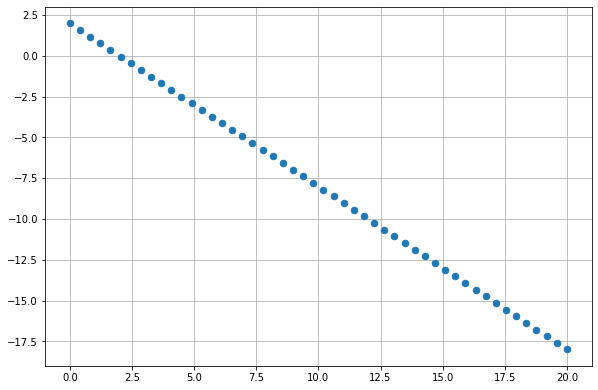

In [4]:
plt.rcParams['figure.figsize'] = [9.8, 6.6]
plt.plot(X,y," ",marker=".", markersize=13 )
plt.grid(True)

## Adagrad

### For a single variable linear regression ML model, build a function to find the optimum Theta_0 and Theta_1 parameters using Adagrad optimization algorithm.
#### The funtion should have the following input parameters:
##### 1. Input data as a matrix (or vector based on your data).
##### 2. Target label as a vector.
##### 3. Learning rate.
##### 4. Epsilon.
##### 5. Maximum number of iterations (Epochs).


#### The funtion should return the following outputs:
##### 1. All predicted Theta_0 in all iterations.
##### 2. All predicted Theta_1 in all iterations.
##### 3. Corresponding loss for each Theta_0 and Theta_1 predictions.
##### 4.All hypothesis outputs (prdicted labels) for each Theta_0 and Theta_1 predictions.
##### 5.Final Optimum values of Theta_0 and Theta_1.
#### Choose the suitable number of iterations, learning rate, Epsilon, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)
#### Try different values of the huperparameters and see the differnce in your results.

##### The following results uses alpha = 0.05, epsilon =  1e-08, and max. iterations = 500.

In [53]:
def adagrad( X, y, alpha,epsilon, iterations=1000, theta_0=0, theta_1=0):
  iter=0
  all_losses=[]
  allthetas_0=[]
  allthetas_1=[]
  all_predicted=[]
  m=X.shape[0]
  vt_theta_0=0
  vt_theta_1=0
  for i in range(0,iterations):
    #calculate Y predict
    h_x=theta_0+theta_1*X

    #save y predicted to array
    predicted=np.array(h_x)
    all_predicted.append(predicted)

    #initialize a 1D vecto for loss between y and y predict
    error_vector=np.array(m)
    error_vector_squared=np.array(m)

    # thetas=[theta_0,theta_1]
    allthetas_0.append(theta_0)
    allthetas_1.append(theta_1)

    
    #calculate loss between y and y predict
    error_vector=h_x-y
    error_vector_squared=pow(error_vector,2)

    #calculate cost function
    j=1/(2*m)*np.sum(error_vector_squared)

    #calculate gradient components (derviative for theta0 and theta 1)
    d_theta_0=(1/m)*np.sum(error_vector)
    d_theta_1=((1/m)*np.dot(error_vector.T,X))


    gradient_vector=np.array([[d_theta_0],[d_theta_1]])


    #gradient_norm
    gradient_norm=np.linalg.norm(gradient_vector) 

    print(f"****************** Iteration {i} ********************\n")
    print(f"h(x): {h_x}")
    print(" ")

    print("Error Vector: ")
    print(error_vector)
    print(" ")

    print(f"j = {j}")
    print(" ")

    print(f"Gradient Vector:")
    print(f"{gradient_vector}\n")

    print("Gradient Vector Norm:")
    print(f"{gradient_norm}\n")

    thetas_opt=[]
    diff=0
    if len(all_losses)>=1:
      index=len(all_losses)-1
      diff=abs(all_losses[index]-j)
    else: diff=j
    
    if diff<0.001 or gradient_norm<0.001:
      thetas_opt.append([theta_0,theta_1])

      print("****************** Training Report ********************\n")
      print(f"Gradient Descent converged after {i} epochs")
      print(f"theta_0_Opt :{thetas_opt[0][0]}")
      print(f"theta_1_Opt :{thetas_opt[0][1]}")
      print("Error Vector: ")
      print(error_vector)
      print(" ")
      print(f"Cost = {j}")

      print("h(x) = y_predict:")
      print(f"{h_x}\n")
      print("y_actual:")
      print(y)

      #save all data to plot later into arrays
      iter=i+1
      all_predicted=np.array(all_predicted)
      allthetas_0=np.array(allthetas_0)
      allthetas_1=np.array(allthetas_1)
      all_losses.append(j)
      all_losses=np.array(all_losses)
      return thetas_opt,allthetas_0,allthetas_1,all_losses,all_predicted,iter
      break


    
    iter+=1
    #calculate vt_1
    vt_theta_0=vt_theta_0+(d_theta_0**2)
    vt_theta_1=vt_theta_1+(d_theta_1**2)

    #update theta
    theta_0=theta_0 - (alpha / np.sqrt(vt_theta_0)+epsilon)*d_theta_0
    theta_1=theta_1 - (alpha / np.sqrt(vt_theta_1)+epsilon)*d_theta_1

    print(f"v_0 : {vt_theta_0}")
    print(f"v_1 : {vt_theta_1}\n")

    print(f"theta_0_new : {theta_0}")
    print(f"theta_1_new : {theta_1}\n")
    all_losses.append(j)
    thetas_opt.append([allthetas_0[-1],allthetas_1[-1]])
  return thetas_opt,allthetas_0,allthetas_1,all_losses,all_predicted,iter

In [54]:
a1=adagrad(X,y,0.05,1e-08,500)

Streaming output truncated to the last 5000 lines.
 -1.94832366 -1.83296211 -1.71760056 -1.60223901 -1.48687747 -1.37151592
 -1.25615437 -1.14079282 -1.02543128 -0.91006973 -0.79470818 -0.67934663
 -0.56398508 -0.44862354 -0.33326199 -0.21790044 -0.10253889  0.01282265
  0.1281842   0.24354575  0.3589073   0.47426884  0.58963039  0.70499194
  0.82035349  0.93571504  1.05107658  1.16643813  1.28179968  1.39716123
  1.51252277  1.62788432  1.74324587  1.85860742  1.97396897  2.08933051
  2.20469206  2.32005361  2.43541516  2.5507767   2.66613825  2.7814998
  2.89686135  3.01222289]
 
j = 1.4029982462619401
 
Gradient Vector:
[[ 0.18586498]
 [11.66438131]]

Gradient Vector Norm:
11.665862041098434

v_0 : 1116.8836741805876
v_1 : 280339.2807914247

theta_0_new : -0.6407710213507916
theta_1_new : -0.7184658380194913

****************** Iteration 140 ********************

h(x): [ -0.64077102  -0.93402238  -1.22727375  -1.52052511  -1.81377647
  -2.10702783  -2.4002792   -2.69353056  -2.98678

In [55]:
from sklearn.metrics import r2_score
r2_score(y,a1[4][-1])

0.9484672858893667

In [33]:
#plot losses with total epochs
def plt_loss_epoch(loss,epoch):
  plt.rcParams['figure.figsize'] = [9.8, 6.6]
  plt.plot(range(0,epoch),loss,"-m",marker=".",markersize=15)
  plt.ylabel("loss")
  plt.xlabel("Epochs")
  plt.grid()

#plot the loss with all theta_0 values
def plt_loss_theta_0(loss,theta_0,alpha,mode="gd",gamma="0.5"):
  plt.plot(theta_0,loss,"-m",marker=".",markersize=15)
  plt.ylabel("loss",fontweight='bold',fontsize=14.0)
  plt.xlabel("Theta 0",fontweight='bold',fontsize=14.0)
  if mode=="gd":
      plt.title(f"Learning Rate = {alpha}",fontweight='bold',fontsize=14.0)
      plt.grid()
  elif mode=="mgd":
        plt.title(f"Learning Rate = 0.05 & ɣ={gamma}",fontweight='bold',fontsize=14.0)
        plt.grid()


#plot the loss with all theta_1 values

def plt_loss_theta_1(loss,theta_1,alpha,mode="gd",gamma=0.5):
  plt.plot(theta_1,loss,"-m",marker=".",markersize=15)
  plt.ylabel("loss",fontweight='bold',fontsize=14.0)
  plt.xlabel("Theta 1",fontweight='bold',fontsize=14.0)
  if mode=="gd":
      plt.title(f"Learning Rate = {alpha}",fontweight='bold',fontsize=14.0)
      plt.grid()
  elif mode=="mgd":
     plt.title(f"Learning Rate = 0.05 & ɣ={gamma}",fontweight='bold',fontsize=14.0)
     plt.grid()



def plt_regression_till_converge(x,y,reg_lines):
  plt.plot(x,y," ",marker=".", markersize=13)
  plt.ylabel("y")
  plt.xlabel("x")
  for pint in reg_lines:
    plt.plot(X,pint,color='r')
  plt.grid()
  plt.legend()


def plt_best_reg_line(x,y,reg_lines):
  plt.plot(X,y," ",marker=".", markersize=13)
  plt.ylabel("y")
  plt.xlabel("x")
  plt.plot(x,reg_lines[-1],color='r')
  plt.grid()
  plt.legend()


def plot_all(output,X,y,alpha=0.05):
  
  fig = plt.figure(figsize=(10.8, 38))

  fig.add_subplot(5,1,1)
  plt_loss_epoch(output[3],output[5])

  fig.add_subplot(5,1,2)
  plt_loss_theta_0(output[3],output[1],alpha)

  fig.add_subplot(5,1,3)
  plt_loss_theta_1(output[3],output[2],alpha)

  fig.add_subplot(5,1,4)
  plt_regression_till_converge(X,y,output[4])

  fig.add_subplot(5,1,5)
  plt_best_reg_line(X,y,output[4])


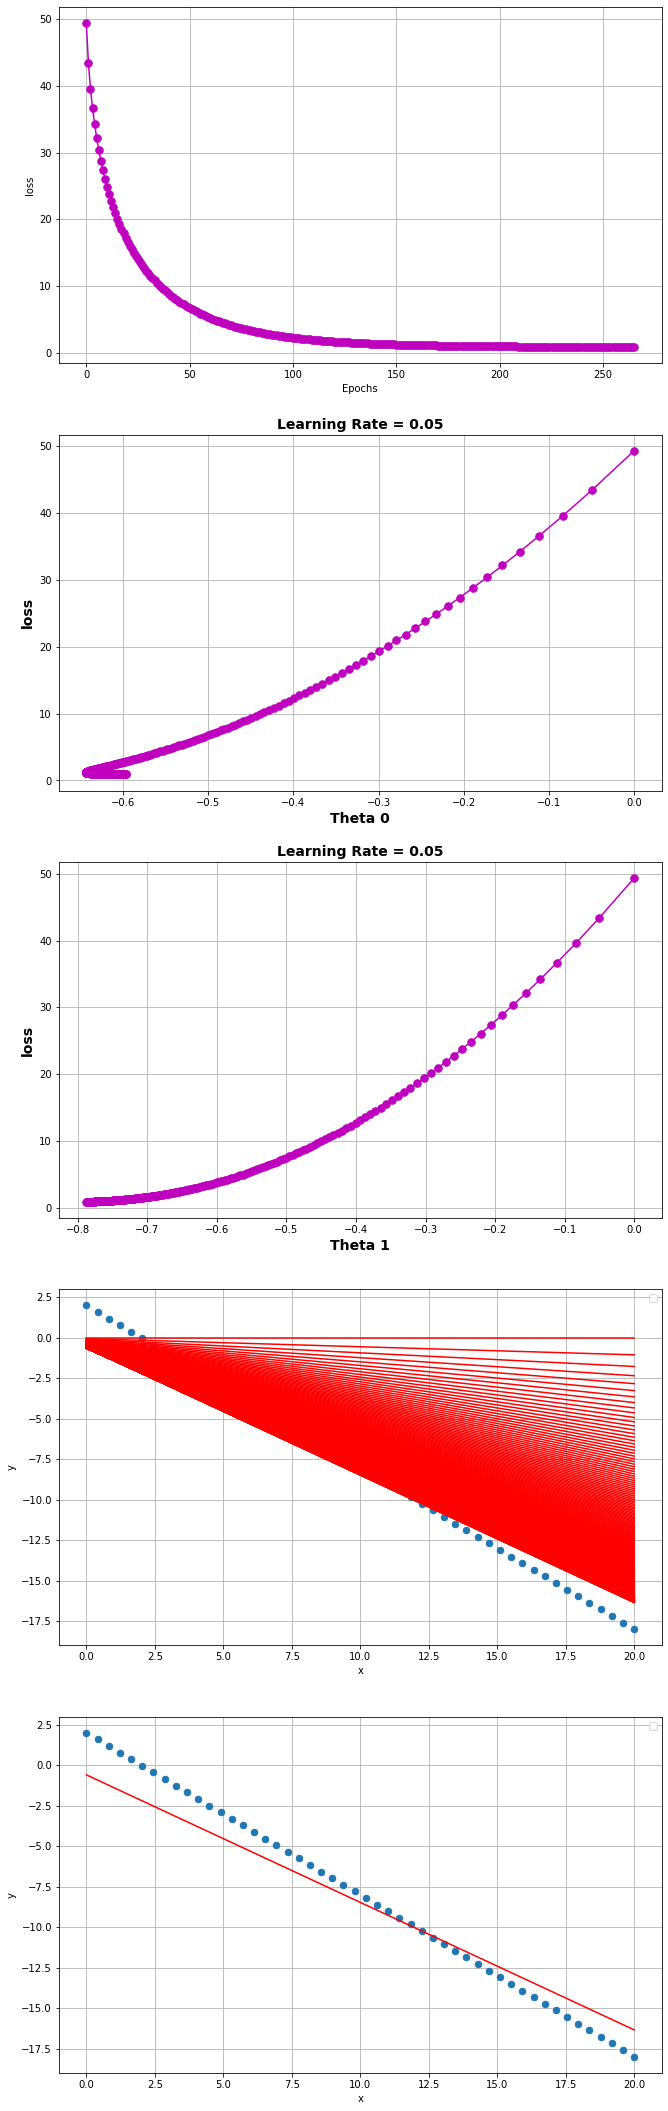

In [58]:
fig = plt.figure(figsize=(10.8, 38))

fig.add_subplot(5,1,1)
plt_loss_epoch(a1[3],a1[5])

fig.add_subplot(5,1,2)
plt_loss_theta_0(a1[3],a1[1],0.05)

fig.add_subplot(5,1,3)
plt_loss_theta_1(a1[3],a1[2],0.05)

fig.add_subplot(5,1,4)
plt_regression_till_converge(X,y,a1[4])

fig.add_subplot(5,1,5)
plt_best_reg_line(X,y,a1[4])

##### The following results uses alpha = 0.005, epsilon =  1e-08, and max. iterations = 5000.

In [59]:
a2=adagrad(X,y,0.005,1e-08,5000)

Streaming output truncated to the last 5000 lines.
34.18342934735933

v_0 : 74679.88464875998
v_1 : 17779711.802882995

theta_0_new : -0.5350142881733041
theta_1_new : -0.5584362401527764

****************** Iteration 4872 ********************

h(x): [ -0.53501429  -0.76294745  -0.99088061  -1.21881377  -1.44674693
  -1.67468008  -1.90261324  -2.1305464   -2.35847956  -2.58641272
  -2.81434588  -3.04227904  -3.2702122   -3.49814536  -3.72607852
  -3.95401168  -4.18194484  -4.409878    -4.63781115  -4.86574431
  -5.09367747  -5.32161063  -5.54954379  -5.77747695  -6.00541011
  -6.23334327  -6.46127643  -6.68920959  -6.91714275  -7.14507591
  -7.37300907  -7.60094222  -7.82887538  -8.05680854  -8.2847417
  -8.51267486  -8.74060802  -8.96854118  -9.19647434  -9.4244075
  -9.65234066  -9.88027382 -10.10820698 -10.33614014 -10.56407329
 -10.79200645 -11.01993961 -11.24787277 -11.47580593 -11.70373909]
 
Error Vector: 
[-2.53501429 -2.35478418 -2.17455408 -1.99432397 -1.81409386 -1.63386376


In [41]:
from sklearn.metrics import r2_score
r2_score(y,a2[4][-1])

0.7095974929990134

In [48]:
alpha=0.005

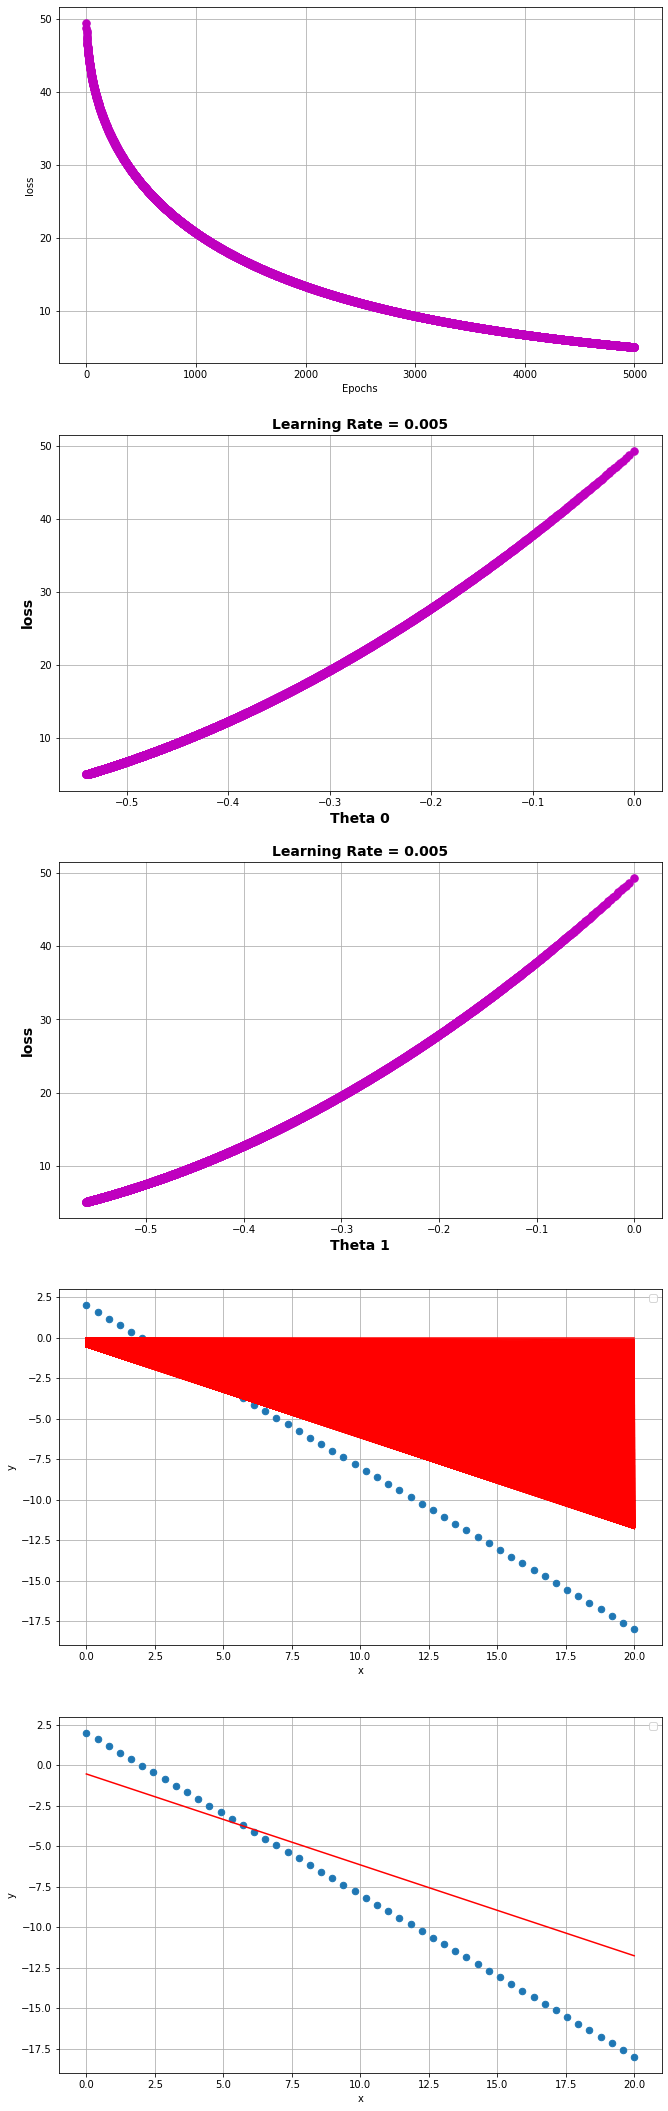

In [49]:
fig = plt.figure(figsize=(10.8, 38))

fig.add_subplot(5,1,1)
plt_loss_epoch(a2[3],a2[5])

fig.add_subplot(5,1,2)
plt_loss_theta_0(a2[3],a2[1],alpha)

fig.add_subplot(5,1,3)
plt_loss_theta_1(a2[3],a2[2],alpha)

fig.add_subplot(5,1,4)
plt_regression_till_converge(X,y,a2[4])

fig.add_subplot(5,1,5)
plt_best_reg_line(X,y,a2[4])

##### The following results uses alpha = 0.0005, epsilon =  1e-08, and max. iterations = 5000.

In [50]:
alpha=0.0005
a3=adagrad(X,y,alpha,1e-08,5000)

Streaming output truncated to the last 5000 lines.
 
Error Vector: 
[-2.05312944 -1.66667596 -1.28022248 -0.89376899 -0.50731551 -0.12086203
  0.26559145  0.65204493  1.03849841  1.4249519   1.81140538  2.19785886
  2.58431234  2.97076582  3.3572193   3.74367278  4.13012627  4.51657975
  4.90303323  5.28948671  5.67594019  6.06239367  6.44884716  6.83530064
  7.22175412  7.6082076   7.99466108  8.38111456  8.76756804  9.15402153
  9.54047501  9.92692849 10.31338197 10.69983545 11.08628893 11.47274242
 11.8591959  12.24564938 12.63210286 13.01855634 13.40500982 13.7914633
 14.17791679 14.56437027 14.95082375 15.33727723 15.72373071 16.11018419
 16.49663768 16.88309116]
 
j = 43.04165337086501
 
Gradient Vector:
[[  7.41498086]
 [106.99835452]]

Gradient Vector Norm:
107.25497569685665

v_0 : 172526.91538259955
v_1 : 35758806.144899264

theta_0_new : -0.05313836458140001
theta_1_new : -0.053197916765801094

****************** Iteration 2977 ********************

h(x): [-0.05313836 -0.074

In [51]:
from sklearn.metrics import r2_score
r2_score(y,a3[4][-1])

-1.473644183283819

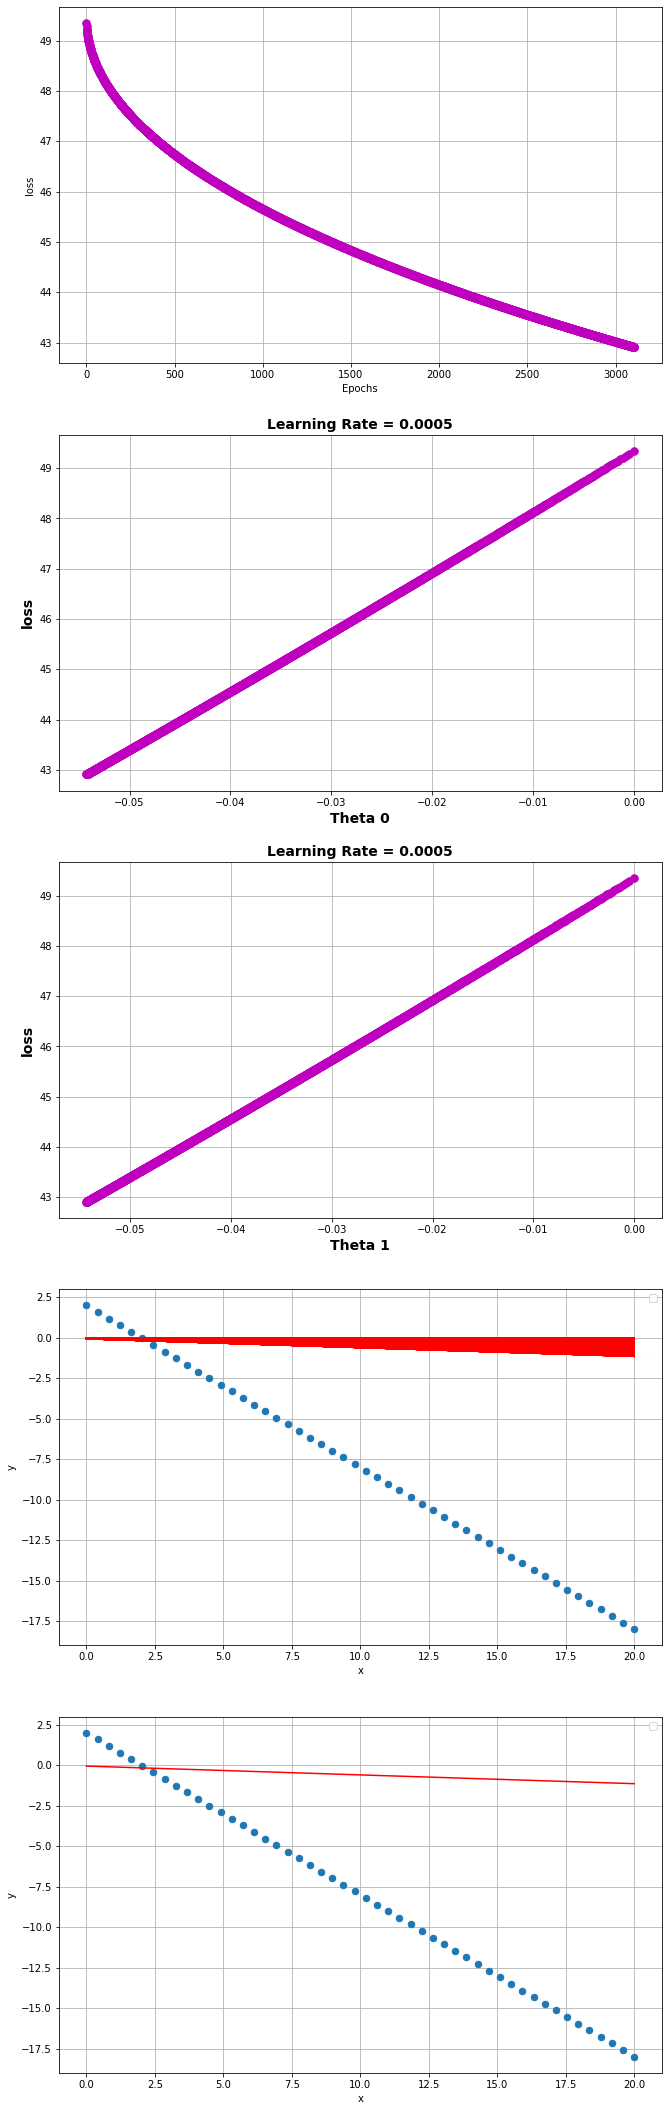

In [52]:

fig = plt.figure(figsize=(10.8, 38))

fig.add_subplot(5,1,1)
plt_loss_epoch(a3[3],a3[5])

fig.add_subplot(5,1,2)
plt_loss_theta_0(a3[3],a3[1],alpha)

fig.add_subplot(5,1,3)
plt_loss_theta_1(a3[3],a3[2],alpha)

fig.add_subplot(5,1,4)
plt_regression_till_converge(X,y,a3[4])

fig.add_subplot(5,1,5)
plt_best_reg_line(X,y,a3[4])

## RMSProp

### Update the previos implementation to be RMSProp.
#### Compare your results with Adagrad results.

In [63]:
def rms( X, y, alpha,beta,epsilon, iterations=1000, theta_0=0, theta_1=0):
  iter=0
  all_losses=[]
  allthetas_0=[]
  allthetas_1=[]
  all_predicted=[]
  m=X.shape[0]
  vt_theta_0=0
  vt_theta_1=0
  for i in range(0,iterations):
    #calculate Y predict
    h_x=theta_0+theta_1*X

    #save y predicted to array
    predicted=np.array(h_x)
    all_predicted.append(predicted)

    #initialize a 1D vecto for loss between y and y predict
    error_vector=np.array(m)
    error_vector_squared=np.array(m)

    # thetas=[theta_0,theta_1]
    allthetas_0.append(theta_0)
    allthetas_1.append(theta_1)

    
    #calculate loss between y and y predict
    error_vector=h_x-y
    error_vector_squared=pow(error_vector,2)

    #calculate cost function
    j=1/(2*m)*np.sum(error_vector_squared)

    #calculate gradient components (derviative for theta0 and theta 1)
    d_theta_0=(1/m)*np.sum(error_vector)
    d_theta_1=((1/m)*np.dot(error_vector.T,X))


    gradient_vector=np.array([[d_theta_0],[d_theta_1]])


    #gradient_norm
    gradient_norm=np.linalg.norm(gradient_vector) 

    print(f"****************** Iteration {i} ********************\n")
    print(f"h(x): {h_x}")
    print(" ")

    print("Error Vector: ")
    print(error_vector)
    print(" ")

    print(f"j = {j}")
    print(" ")

    print(f"Gradient Vector:")
    print(f"{gradient_vector}\n")

    print("Gradient Vector Norm:")
    print(f"{gradient_norm}\n")

    thetas_opt=[]
    diff=0
    if len(all_losses)>=1:
      index=len(all_losses)-1
      diff=abs(all_losses[index]-j)
    else: diff=j
    
    if diff<0.001 or gradient_norm<0.001:
      thetas_opt.append([theta_0,theta_1])

      print("****************** Training Report ********************\n")
      print(f"Gradient Descent converged after {i} epochs")
      print(f"theta_0_Opt :{thetas_opt[0][0]}")
      print(f"theta_1_Opt :{thetas_opt[0][1]}")
      print("Error Vector: ")
      print(error_vector)
      print(" ")
      print(f"Cost = {j}")

      print("h(x) = y_predict:")
      print(f"{h_x}\n")
      print("y_actual:")
      print(y)

      #save all data to plot later into arrays
      iter=i+1
      all_predicted=np.array(all_predicted)
      allthetas_0=np.array(allthetas_0)
      allthetas_1=np.array(allthetas_1)
      all_losses.append(j)
      all_losses=np.array(all_losses)
      return thetas_opt,allthetas_0,allthetas_1,all_losses,all_predicted,iter
      break


    
    iter+=1
    #calculate vt_1
    vt_theta_0=(beta*vt_theta_0)+((1-beta)*(d_theta_0**2))
    vt_theta_1=(beta*vt_theta_1)+((1-beta)*(d_theta_1**2))

    #update theta
    theta_0=theta_0 - (alpha / (np.sqrt(vt_theta_0)+epsilon))*d_theta_0
    theta_1=theta_1 - (alpha / (np.sqrt(vt_theta_1)+epsilon))*d_theta_1

    print(f"v_0 : {vt_theta_0}")
    print(f"v_1 : {vt_theta_1}\n")

    print(f"theta_0_new : {theta_0}")
    print(f"theta_1_new : {theta_1}\n")
    all_losses.append(j)
    thetas_opt.append([allthetas_0[-1],allthetas_1[-1]])
  return thetas_opt,allthetas_0,allthetas_1,all_losses,all_predicted,iter

##### The following results uses alpha = 0.05, beta = 0.9, epsilon =  1e-08, and max. iterations = 500.

In [64]:
alpha=0.05
r1=rms(X,y,0.05,0.9,1e-08,500)

****************** Iteration 0 ********************

h(x): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
 
Error Vector: 
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]
 
j = 49.34693877551021
 
Gradient Vector:
[[  8.        ]
 [114.69387755]]

Gradient Vector Norm:
114.97254258164628

v_0 : 6.399999999999999
v_1 : 1315.4685547

In [65]:
from sklearn.metrics import r2_score
r2_score(y,r1[4][-1])

0.9993602095484933

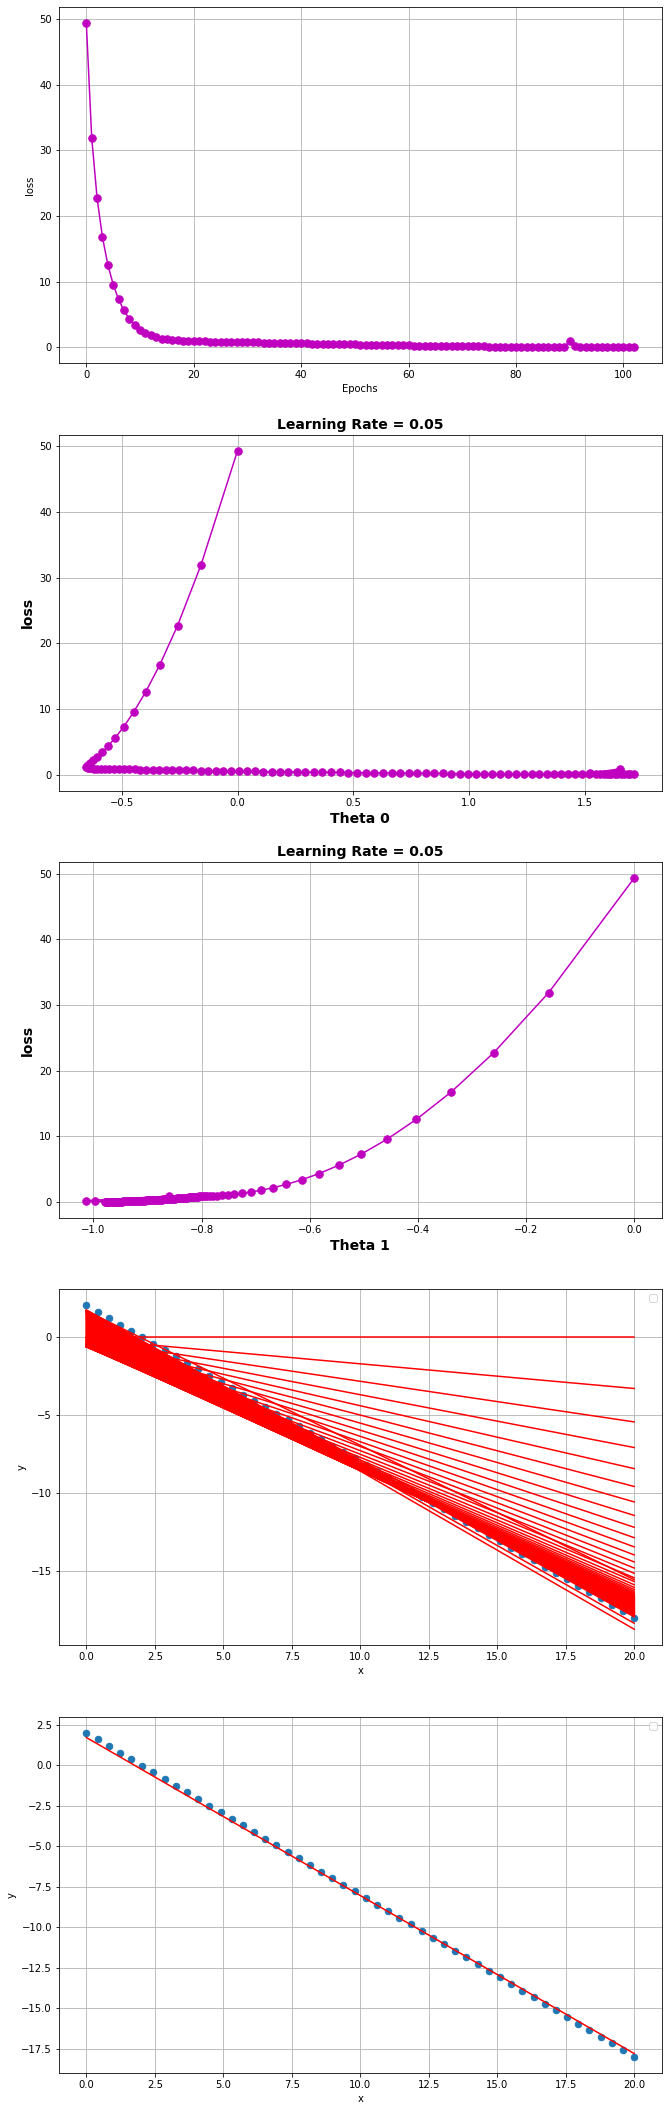

In [66]:

fig = plt.figure(figsize=(10.8, 38))

fig.add_subplot(5,1,1)
plt_loss_epoch(r1[3],r1[5])

fig.add_subplot(5,1,2)
plt_loss_theta_0(r1[3],r1[1],0.05)

fig.add_subplot(5,1,3)
plt_loss_theta_1(r1[3],r1[2],0.05)

fig.add_subplot(5,1,4)
plt_regression_till_converge(X,y,r1[4])

fig.add_subplot(5,1,5)
plt_best_reg_line(X,y,r1[4])

##### The following results uses alpha = 0.005, beta = 0.9, epsilon =  1e-08, and max. iterations = 5000.

In [67]:
alpha=0.005
r2=rms(X,y,alpha,0.9,1e-08,5000)

Streaming output truncated to the last 5000 lines.
 -0.62752991 -0.58327719 -0.53902447 -0.49477175 -0.45051903 -0.40626631
 -0.36201359 -0.31776087 -0.27350815 -0.22925543 -0.18500271 -0.14075
 -0.09649728 -0.05224456 -0.00799184  0.03626088  0.0805136   0.12476632
  0.16901904  0.21327176  0.25752448  0.3017772   0.34602992  0.39028264
  0.43453536  0.47878808  0.5230408   0.56729352  0.61154624  0.65579896
  0.70005168  0.7443044 ]
 
j = 0.2616699860190454
 
Gradient Vector:
[[-0.33988723]
 [ 0.36260883]]

Gradient Vector Norm:
0.4969994954819015

v_0 : 0.14131113107978338
v_1 : 0.11532190644674305

theta_0_new : 0.5804419494295537
theta_1_new : -0.8969197452278128

****************** Iteration 416 ********************

h(x): [  0.58044195   0.21435226  -0.15173743  -0.51782713  -0.88391682
  -1.25000651  -1.6160962   -1.98218589  -2.34827559  -2.71436528
  -3.08045497  -3.44654466  -3.81263435  -4.17872405  -4.54481374
  -4.91090343  -5.27699312  -5.64308281  -6.00917251  -6.375262

In [68]:
from sklearn.metrics import r2_score
r2_score(y,r2[4][-1])

0.9948527107478715

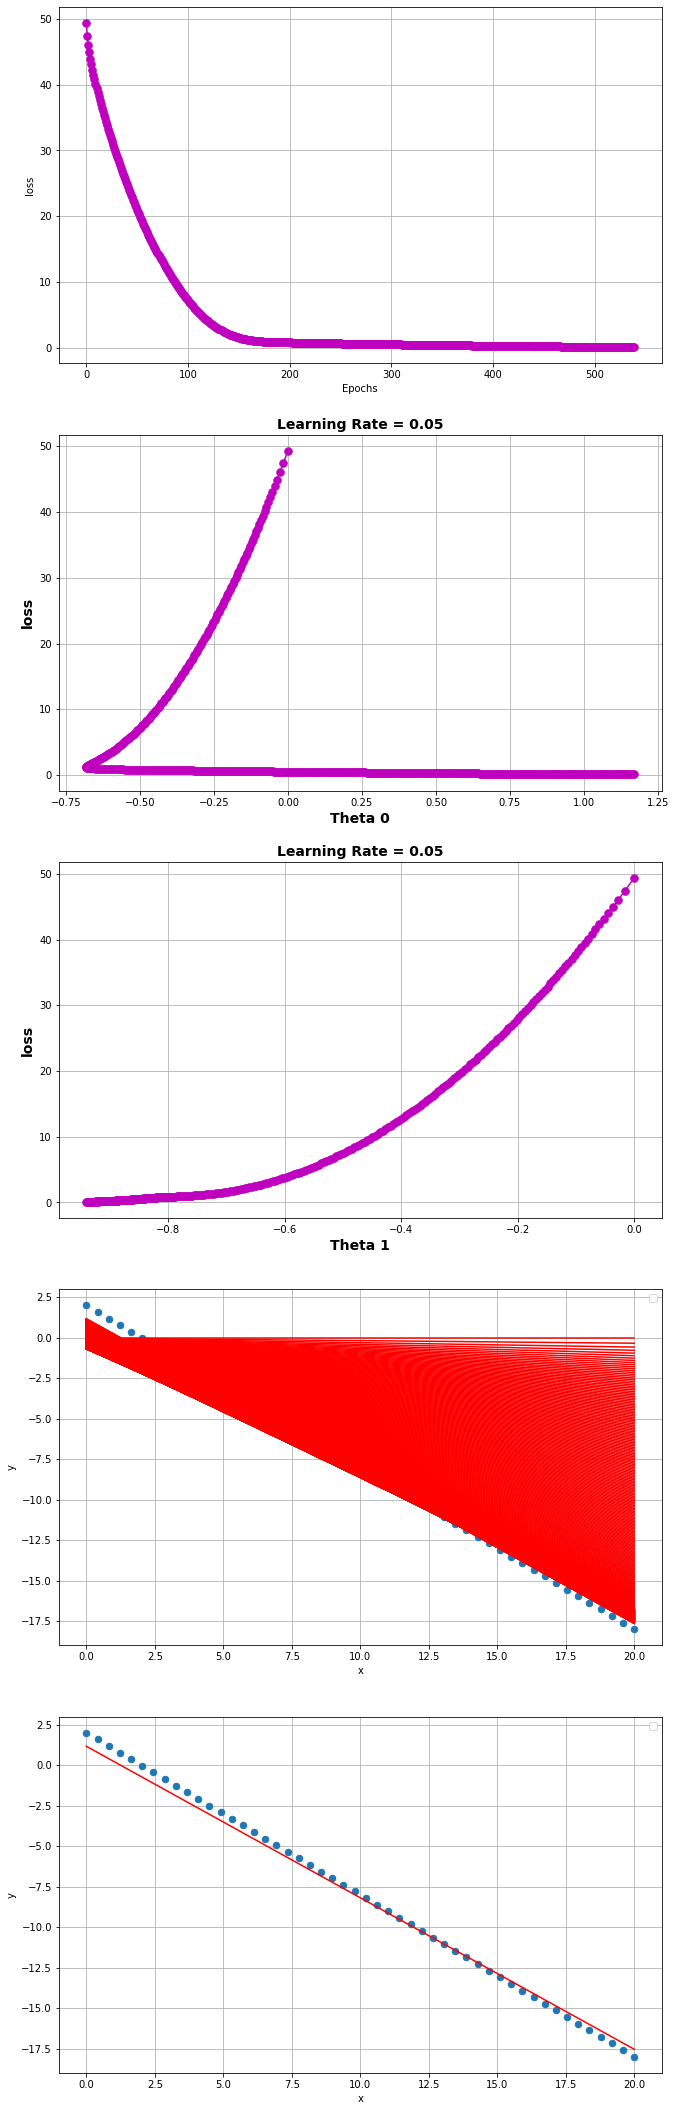

In [69]:

fig = plt.figure(figsize=(10.8, 38))

fig.add_subplot(5,1,1)
plt_loss_epoch(r2[3],r2[5])

fig.add_subplot(5,1,2)
plt_loss_theta_0(r2[3],r2[1],0.05)

fig.add_subplot(5,1,3)
plt_loss_theta_1(r2[3],r2[2],0.05)

fig.add_subplot(5,1,4)
plt_regression_till_converge(X,y,r2[4])

fig.add_subplot(5,1,5)
plt_best_reg_line(X,y,r2[4])

##### The following results uses alpha = 0.0005, beta = 0.9, epsilon =  1e-08, and max. iterations = 5000.

In [70]:
alpha=0.0005

r3=rms(X,y,alpha,0.9,1e-08,5000)

Streaming output truncated to the last 5000 lines.
  -8.20740323  -8.50723688  -8.80707053  -9.10690418  -9.40673783
  -9.70657148 -10.00640514 -10.30623879 -10.60607244 -10.90590609
 -11.20573974 -11.5055734  -11.80540705 -12.1052407  -12.40507435
 -12.704908   -13.00474165 -13.30457531 -13.60440896 -13.90424261
 -14.20407626 -14.50390991 -14.80374357 -15.10357722 -15.40341087]
 
Error Vector: 
[-2.71156193 -2.60323232 -2.4949027  -2.38657309 -2.27824348 -2.16991386
 -2.06158425 -1.95325463 -1.84492502 -1.73659541 -1.62826579 -1.51993618
 -1.41160657 -1.30327695 -1.19494734 -1.08661773 -0.97828811 -0.8699585
 -0.76162889 -0.65329927 -0.54496966 -0.43664005 -0.32831043 -0.21998082
 -0.11165121 -0.00332159  0.10500802  0.21333763  0.32166725  0.42999686
  0.53832647  0.64665609  0.7549857   0.86331532  0.97164493  1.07997454
  1.18830416  1.29663377  1.40496338  1.513293    1.62162261  1.72995222
  1.83828184  1.94661145  2.05494106  2.16327068  2.27160029  2.3799299
  2.48825952  2.596

In [71]:
from sklearn.metrics import r2_score
r2_score(y,r3[4][-1])

0.9476184845511563

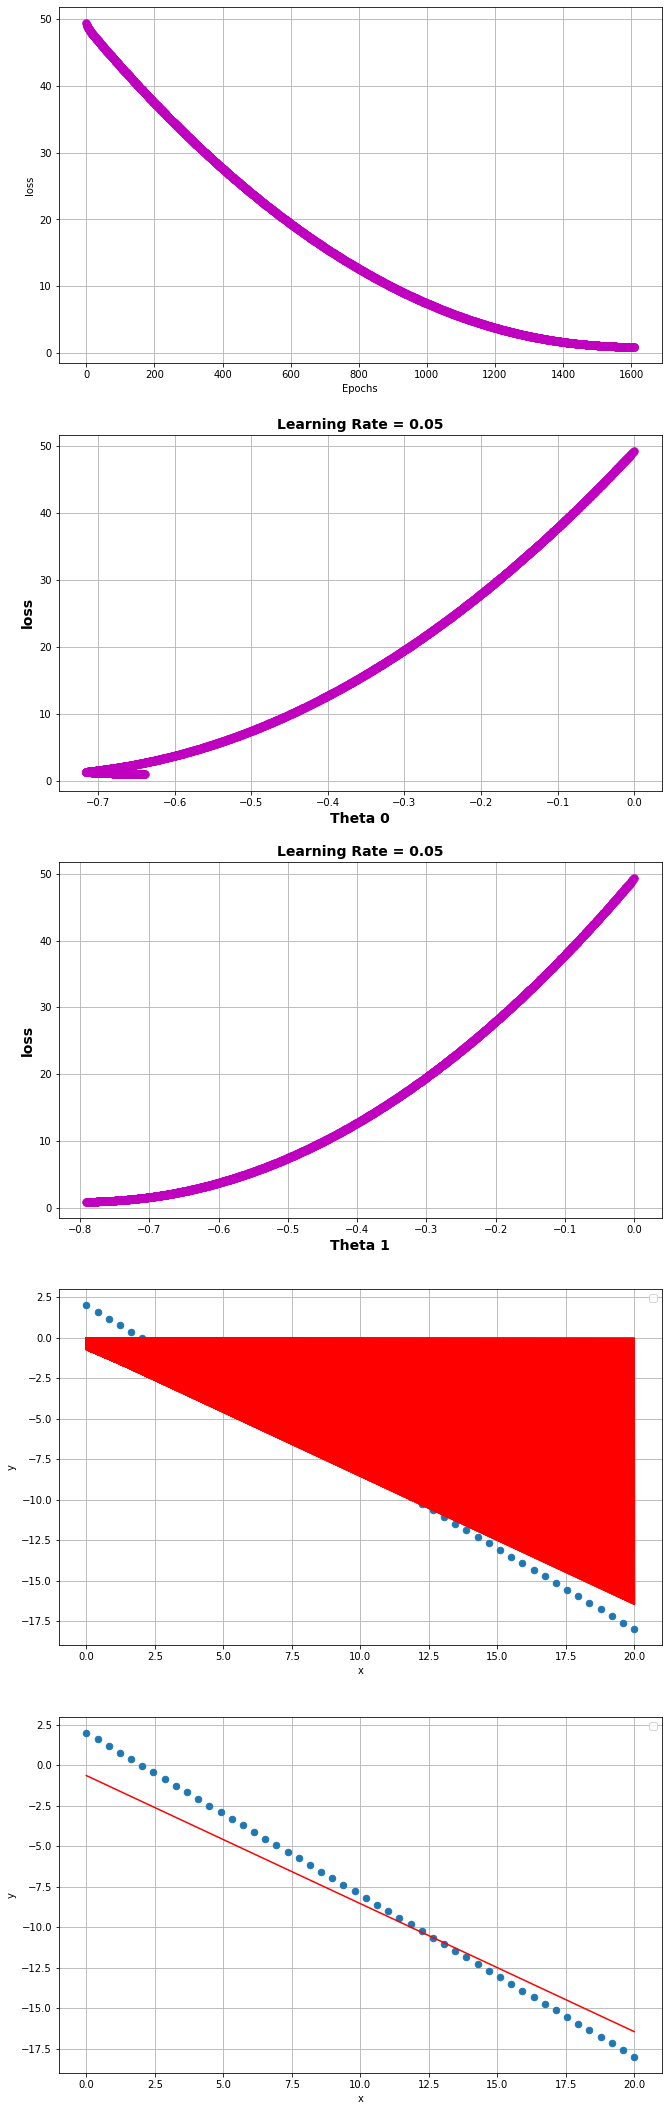

In [72]:

fig = plt.figure(figsize=(10.8, 38))

fig.add_subplot(5,1,1)
plt_loss_epoch(r3[3],r3[5])

fig.add_subplot(5,1,2)
plt_loss_theta_0(r3[3],r3[1],0.05)

fig.add_subplot(5,1,3)
plt_loss_theta_1(r3[3],r3[2],0.05)

fig.add_subplot(5,1,4)
plt_regression_till_converge(X,y,r3[4])

fig.add_subplot(5,1,5)
plt_best_reg_line(X,y,r3[4])

## Adam

### Update the previos implementation to be Adam.
#### Compare your results with Adagrad and RMSProp results.

In [7]:
def adam(X, y, alpha, beta1,beta2, epsilon, iterations=1000, theta_0=0, theta_1=0):
    iter = 0
    all_losses = []
    allthetas_0 = []
    allthetas_1 = []
    all_predicted = []
    m = X.shape[0]
    vt_theta_0 = 0
    vt_theta_1 = 0

    mt_theta_0=0
    mt_theta_1=1
    for i in range(0, iterations):
        # calculate Y predict
        h_x = theta_0 + theta_1 * X

        # save y predicted to array
        predicted = np.array(h_x)
        all_predicted.append(predicted)

        # initialize a 1D vecto for loss between y and y predict
        error_vector = np.array(m)
        error_vector_squared = np.array(m)

        # thetas=[theta_0,theta_1]
        allthetas_0.append(theta_0)
        allthetas_1.append(theta_1)

        # calculate loss between y and y predict
        error_vector = h_x - y
        error_vector_squared = pow(error_vector, 2)

        # calculate cost function
        j = 1 / (2 * m) * np.sum(error_vector_squared)

        # calculate gradient components (derviative for theta0 and theta 1)
        d_theta_0 = (1 / m) * np.sum(error_vector)
        d_theta_1 = ((1 / m) * np.dot(error_vector.T, X))

        gradient_vector = np.array([[d_theta_0], [d_theta_1]])

        # gradient_norm
        gradient_norm = np.linalg.norm(gradient_vector)

        print(f"****************** Iteration {i} ********************\n")
        print(f"h(x): {h_x}")
        print(" ")

        print("Error Vector: ")
        print(error_vector)
        print(" ")

        print(f"j = {j}")
        print(" ")

        print(f"Gradient Vector:")
        print(f"{gradient_vector}\n")

        print("Gradient Vector Norm:")
        print(f"{gradient_norm}\n")

        thetas_opt = []
        diff = 0
        if len(all_losses) >= 1:
            index = len(all_losses) - 1
            diff = abs(all_losses[index] - j)
        else:
            diff = j

        if diff < 0.001 or gradient_norm < 0.01:
            
            thetas_opt.append([theta_0, theta_1])

            print("****************** Training Report ********************\n")
            print(f"Gradient Descent converged after {i} epochs")
            print(f"theta_0_Opt :{thetas_opt[0][0]}")
            print(f"theta_1_Opt :{thetas_opt[0][1]}")
            print("Error Vector: ")
            print(error_vector)
            print(" ")
            print(f"Cost = {j}")

            print("h(x) = y_predict:")
            print(f"{h_x}\n")
            print("y_actual:")
            print(y)

            # save all data to plot later into arrays
            iter = i + 1
            all_predicted = np.array(all_predicted)
            allthetas_0 = np.array(allthetas_0)
            allthetas_1 = np.array(allthetas_1)
            all_losses.append(j)
            all_losses = np.array(all_losses)
            return thetas_opt, allthetas_0, allthetas_1, all_losses, all_predicted, iter
            break

        iter += 1

        # momentum equationS
        mt_theta_0 = (mt_theta_0 * beta1) + ((1 - beta1) * d_theta_0)
        mt_theta_1 = (mt_theta_1 * beta1) + ((1 - beta1) * d_theta_1)

        # rms equations
        # calculate vt_1
        vt_theta_0 = (beta2 * vt_theta_0) + ((1 - beta2) * (d_theta_0 ** 2))
        vt_theta_1 = (beta2 * vt_theta_1) + ((1 - beta2) * (d_theta_1 ** 2))

        mt_theta0_h = mt_theta_0 / (1 - pow(beta1,iter))
        mt_theta1_h = mt_theta_1 / (1 - pow(beta1,iter))

        vt_theta0_h = vt_theta_0 / (1 - pow(beta2,iter))
        vt_theta1_h = vt_theta_1 / (1 - pow(beta2,iter))



        # adam update theta
        theta_0 = theta_0 - (alpha / (np.sqrt(vt_theta0_h) + epsilon) * mt_theta0_h)
        theta_1 = theta_1 - (alpha / (np.sqrt(vt_theta1_h) + epsilon) * mt_theta1_h)


        print(f"m_0_0 : {mt_theta_0}")
        print(f"m_0_1 : {mt_theta_1}\n")

        print(f"m_0_0_corrected : {mt_theta0_h}")
        print(f"m_0_1_corrected : {mt_theta1_h}\n")

        print(f"v_0_0 : {vt_theta_0}")
        print(f"v_0_1 : {vt_theta_1}\n")

        print(f"v_0_0_corrected : {vt_theta0_h}")
        print(f"v_0_1_corrected : {vt_theta1_h}\n")

        print(f"theta_0_new : {theta_0}")
        print(f"theta_1_new : {theta_1}\n")
        all_losses.append(j)
        thetas_opt.append([allthetas_0[-1], allthetas_1[-1]])
    return thetas_opt, allthetas_0, allthetas_1, all_losses, all_predicted, iter


##### The following results uses alpha = 0.05, beta1 = 0.05, beta2 = 0.7, epsilon =  1e-08, and max. iterations = 500.

In [12]:
ad1=adam(X,y,0.05,0.2,0.7,1e-08,500)

****************** Iteration 0 ********************

h(x): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
 
Error Vector: 
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]
 
j = 49.34693877551021
 
Gradient Vector:
[[  8.        ]
 [114.69387755]]

Gradient Vector Norm:
114.97254258164628

m_0_0 : 6.4
m_0_1 : 91.95510204081634

m_0

In [13]:
alpha=0.05
from sklearn.metrics import r2_score

r2_score(y,ad1[4][-1])

0.9989681658862434

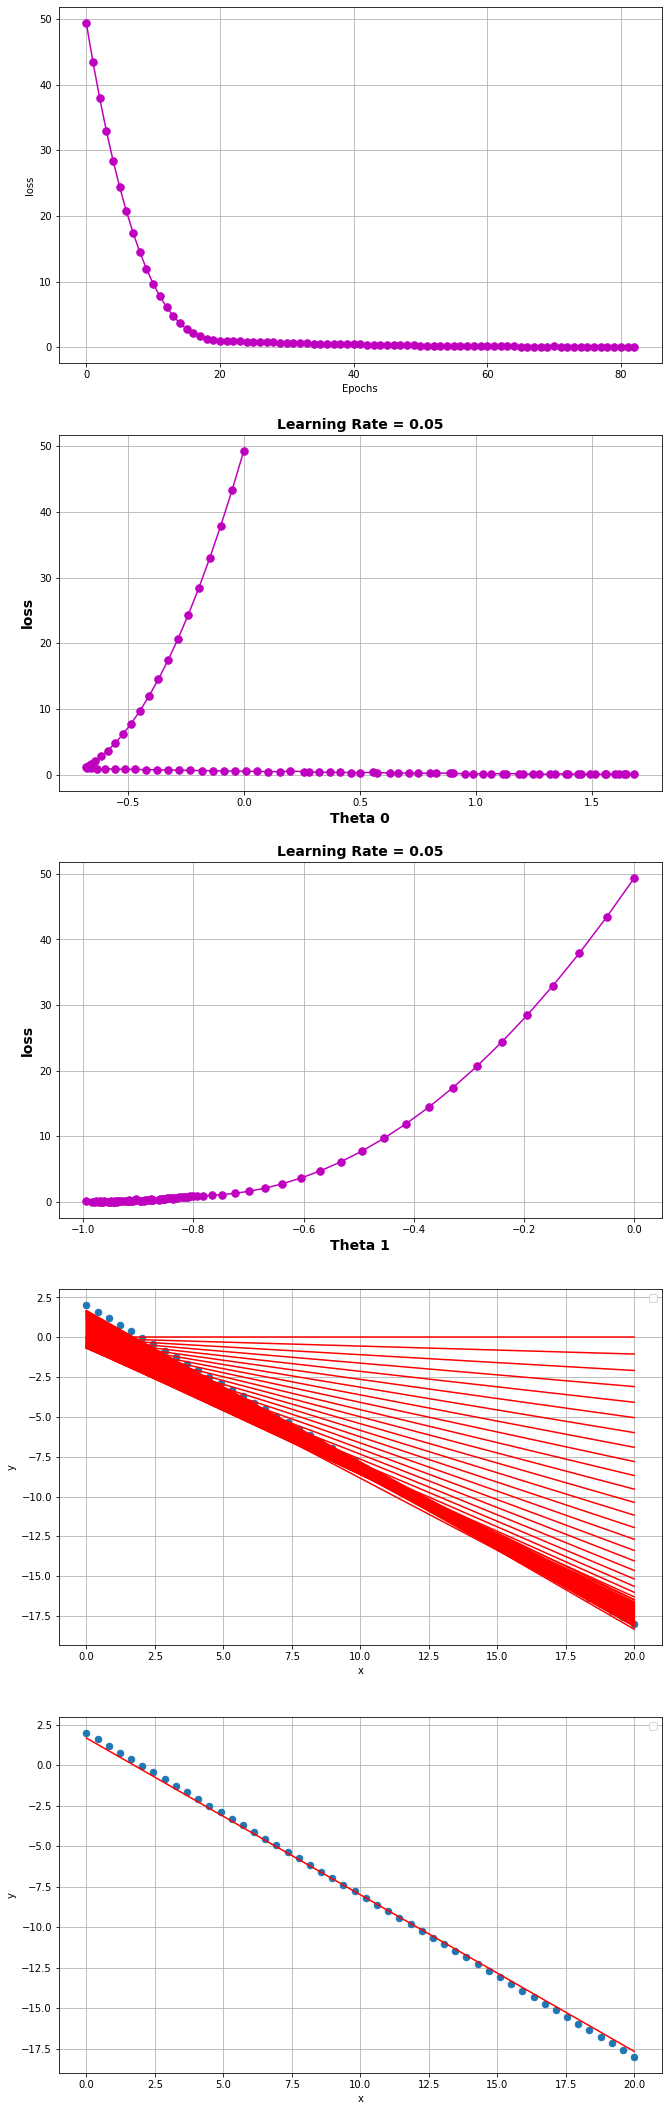

In [14]:
fig = plt.figure(figsize=(10.8, 38))

fig.add_subplot(5,1,1)
plt_loss_epoch(ad1[3],ad1[5])

fig.add_subplot(5,1,2)
plt_loss_theta_0(ad1[3],ad1[1],alpha)

fig.add_subplot(5,1,3)
plt_loss_theta_1(ad1[3],ad1[2],alpha)

fig.add_subplot(5,1,4)
plt_regression_till_converge(X,y,ad1[4])


fig.add_subplot(5,1,5)
plt_best_reg_line(X,y,ad1[4])

##### The following results uses alpha = 0.005, beta1 = 0.5, beta2 = 0.8, epsilon =  1e-08, and max. iterations = 500.

In [16]:

alpha=0.005
ad2=adam(X,y,alpha,0.5,0.8,1e-08,500)

Streaming output truncated to the last 5000 lines.
v_0_1 : 0.01381698681794755

v_0_0_corrected : 0.15456360847250905
v_0_1_corrected : 0.01381698681794755

theta_0_new : 0.5002008981342975
theta_1_new : -0.8877940923603433

****************** Iteration 397 ********************

h(x): [  0.5002009    0.13783596  -0.22452897  -0.58689391  -0.94925884
  -1.31162378  -1.67398872  -2.03635365  -2.39871859  -2.76108352
  -3.12344846  -3.48581339  -3.84817833  -4.21054327  -4.5729082
  -4.93527314  -5.29763807  -5.66000301  -6.02236794  -6.38473288
  -6.74709782  -7.10946275  -7.47182769  -7.83419262  -8.19655756
  -8.55892249  -8.92128743  -9.28365236  -9.6460173  -10.00838224
 -10.37074717 -10.73311211 -11.09547704 -11.45784198 -11.82020691
 -12.18257185 -12.54493679 -12.90730172 -13.26966666 -13.63203159
 -13.99439653 -14.35676146 -14.7191264  -15.08149134 -15.44385627
 -15.80622121 -16.16858614 -16.53095108 -16.89331601 -17.25568095]
 
Error Vector: 
[-1.4997991  -1.45400077 -1.40820244 

In [17]:
from sklearn.metrics import r2_score
print(f"the score : {r2_score(y,ad2[4][-1])}")

the score : 0.9926311951398792


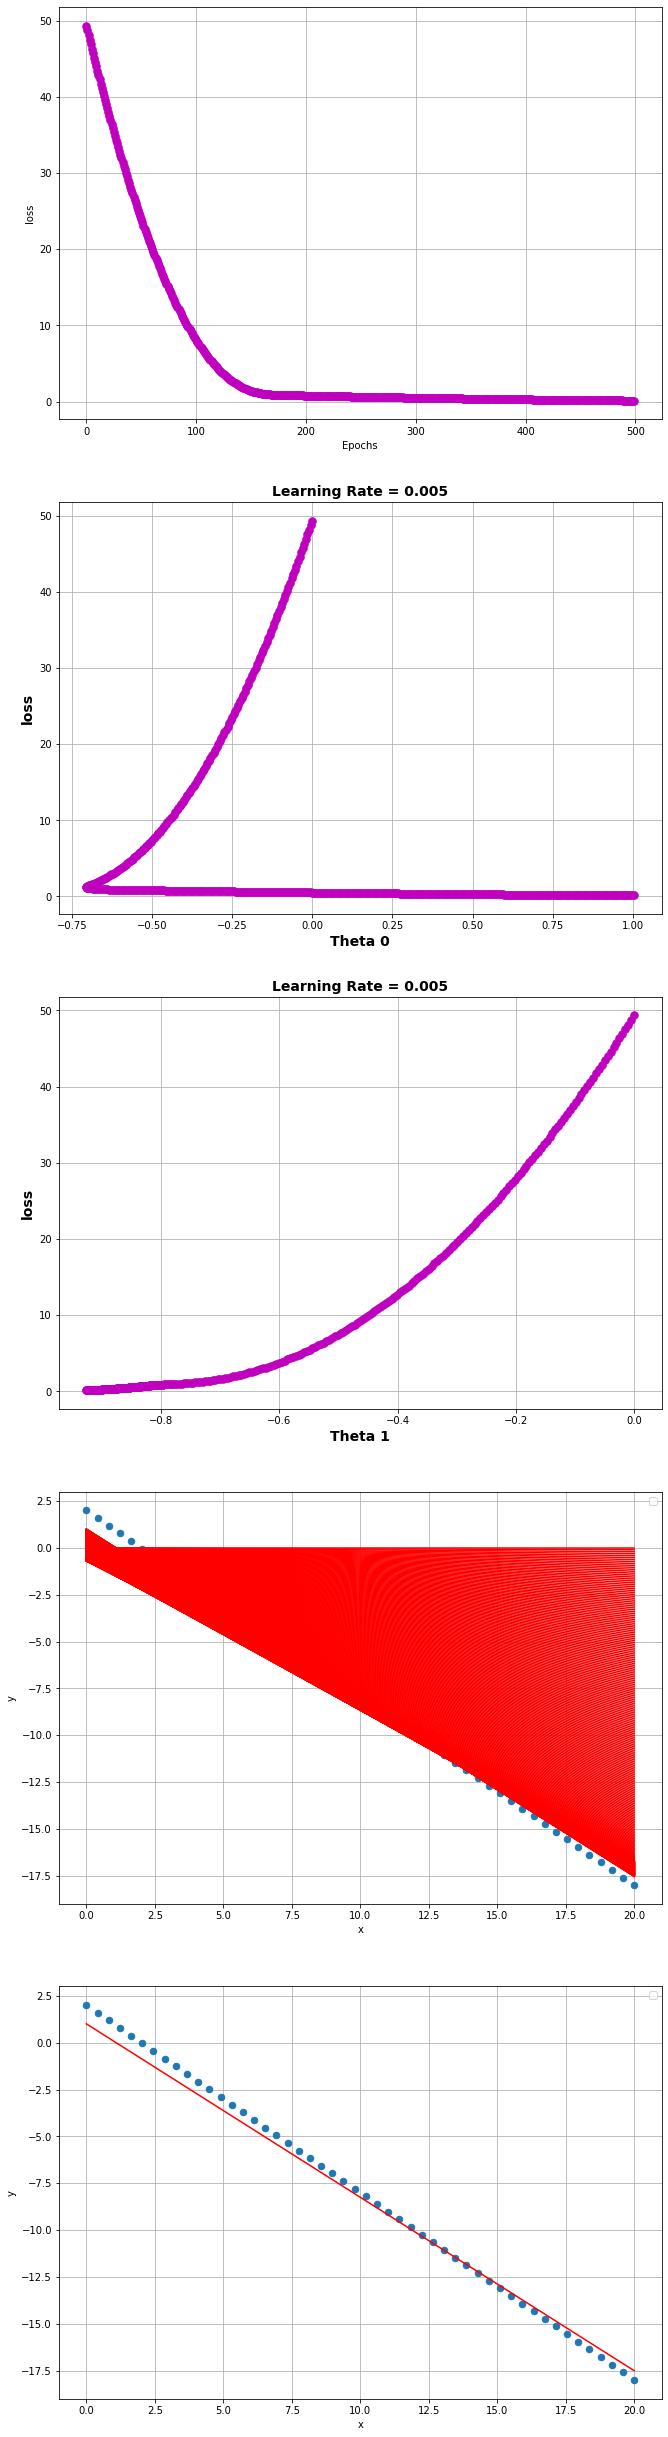

In [18]:
fig = plt.figure(figsize=(10.8, 44))

fig.add_subplot(5,1,1)
plt_loss_epoch(ad2[3],ad2[5])

fig.add_subplot(5,1,2)
plt_loss_theta_0(ad2[3],ad2[1],alpha)

fig.add_subplot(5,1,3)
plt_loss_theta_1(ad2[3],ad2[2],alpha)

fig.add_subplot(5,1,4)
plt_regression_till_converge(X,y,ad2[4])

fig.add_subplot(5,1,5)
plt_best_reg_line(X,y,ad2[4])

##### The following results uses alpha = 0.0005, beta1 = 0.8, beta2 = 0.8, epsilon =  1e-08, and max. iterations = 5000.

In [19]:
alpha=0.0005
ad3=adam(X,y,alpha,0.8,0.8,1e-08,5000)

Streaming output truncated to the last 5000 lines.

v_0_0_corrected : 0.011529785733064003
v_0_1_corrected : 64.37214955803698

theta_0_new : -0.7180150570011916
theta_1_new : -0.7410000555319355

****************** Iteration 1482 ********************

h(x): [ -0.71801506  -1.02046406  -1.32291306  -1.62536206  -1.92781107
  -2.23026007  -2.53270907  -2.83515807  -3.13760708  -3.44005608
  -3.74250508  -4.04495408  -4.34740308  -4.64985209  -4.95230109
  -5.25475009  -5.55719909  -5.8596481   -6.1620971   -6.4645461
  -6.7669951   -7.0694441   -7.37189311  -7.67434211  -7.97679111
  -8.27924011  -8.58168912  -8.88413812  -9.18658712  -9.48903612
  -9.79148512 -10.09393413 -10.39638313 -10.69883213 -11.00128113
 -11.30373014 -11.60617914 -11.90862814 -12.21107714 -12.51352615
 -12.81597515 -13.11842415 -13.42087315 -13.72332215 -14.02577116
 -14.32822016 -14.63066916 -14.93311816 -15.23556717 -15.53801617]
 
Error Vector: 
[-2.71801506 -2.61230079 -2.50658653 -2.40087227 -2.295158   -2.

In [20]:
from sklearn.metrics import r2_score
print(f"the score : {r2_score(y,ad3[4][-1])}")

the score : 0.9467864686555328


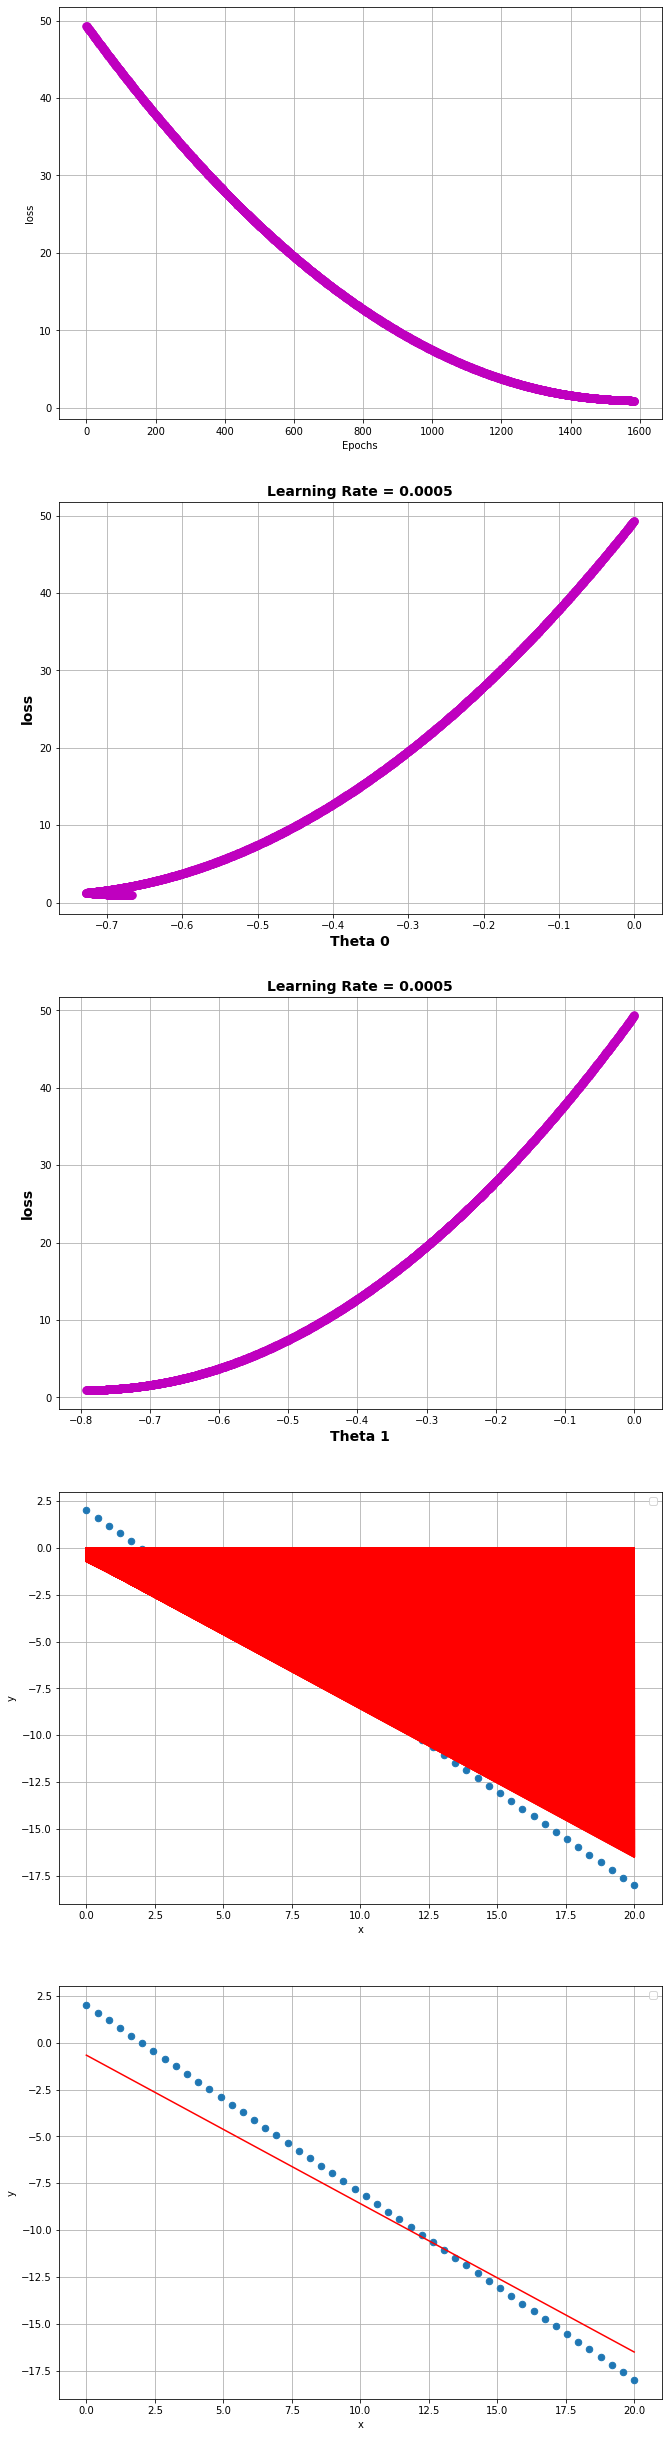

In [21]:

fig = plt.figure(figsize=(10.8, 44))

fig.add_subplot(5,1,1)
plt_loss_epoch(ad3[3],ad3[5])

fig.add_subplot(5,1,2)
plt_loss_theta_0(ad3[3],ad3[1],alpha)

fig.add_subplot(5,1,3)
plt_loss_theta_1(ad3[3],ad3[2],alpha)

fig.add_subplot(5,1,4)
plt_regression_till_converge(X,y,ad3[4])


fig.add_subplot(5,1,5)
plt_best_reg_line(X,y,ad3[4])

### Play with the parameters and see the results

##### The following results uses alpha = 0.001, beta1 = 0.9, beta2 = 0.99, epsilon =  1e-08, and max. iterations = 5000.

In [22]:
alpha=0.001
ad4=adam(X,y,alpha,0.9,0.99,1e-08,5000)

Streaming output truncated to the last 5000 lines.
theta_0_new : -0.6630216254388345
theta_1_new : -0.7566175601509431

****************** Iteration 961 ********************

h(x): [ -0.66302163  -0.97184512  -1.28066861  -1.58949211  -1.8983156
  -2.2071391   -2.51596259  -2.82478608  -3.13360958  -3.44243307
  -3.75125656  -4.06008006  -4.36890355  -4.67772705  -4.98655054
  -5.29537403  -5.60419753  -5.91302102  -6.22184452  -6.53066801
  -6.8394915   -7.148315    -7.45713849  -7.76596199  -8.07478548
  -8.38360897  -8.69243247  -9.00125596  -9.31007946  -9.61890295
  -9.92772644 -10.23654994 -10.54537343 -10.85419693 -11.16302042
 -11.47184391 -11.78066741 -12.0894909  -12.3983144  -12.70713789
 -13.01596138 -13.32478488 -13.63360837 -13.94243186 -14.25125536
 -14.56007885 -14.86890235 -15.17772584 -15.48654933 -15.79537283]
 
Error Vector: 
[-2.66302163 -2.56368185 -2.46434208 -2.36500231 -2.26566254 -2.16632277
 -2.066983   -1.96764323 -1.86830345 -1.76896368 -1.66962391 -1.57028

In [23]:
from sklearn.metrics import r2_score
print(f"the score : {r2_score(y,ad4[4][-1])}")

the score : 0.9485887893972601


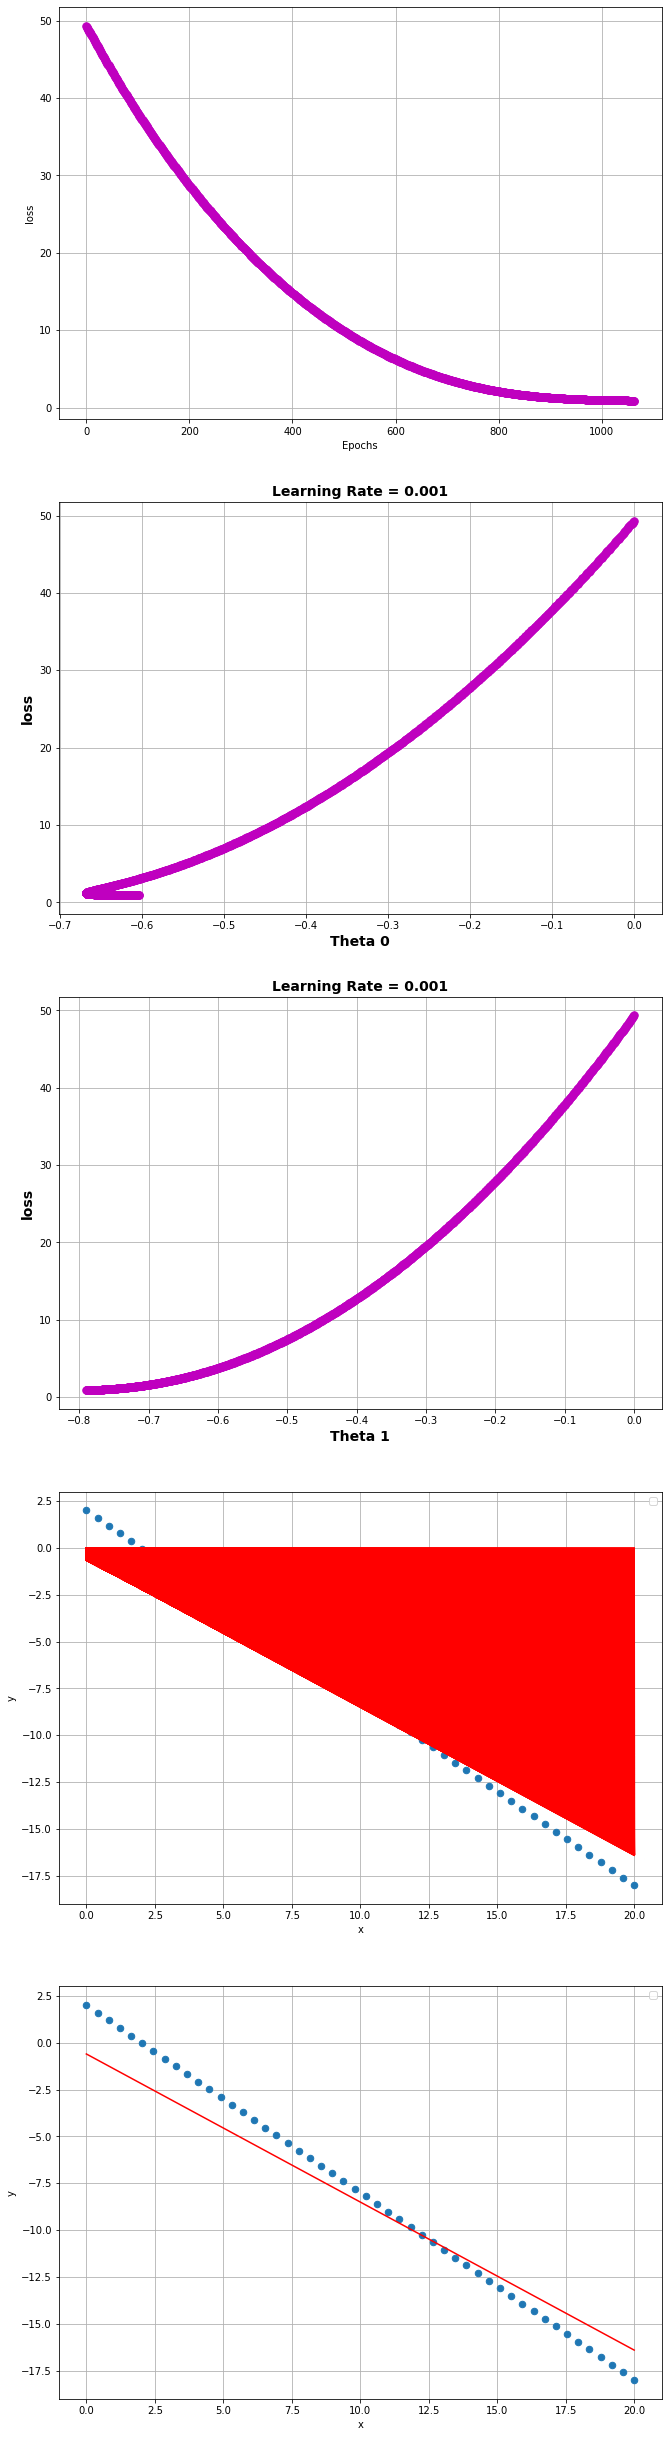

In [24]:

fig = plt.figure(figsize=(10.8, 44))

fig.add_subplot(5,1,1)
plt_loss_epoch(ad4[3],ad4[5])

fig.add_subplot(5,1,2)
plt_loss_theta_0(ad4[3],ad4[1],alpha)

fig.add_subplot(5,1,3)
plt_loss_theta_1(ad4[3],ad4[2],alpha)

fig.add_subplot(5,1,4)
plt_regression_till_converge(X,y,ad4[4])


fig.add_subplot(5,1,5)
plt_best_reg_line(X,y,ad4[4])

##### The following results uses alpha = 0.001, beta1 = 0.9, beta2 = 0.5, epsilon =  1e-08, and max. iterations = 5000.

In [25]:
alpha=0.001
ad5=adam(X,y,alpha,0.9,0.5,1e-08,5000)

Streaming output truncated to the last 5000 lines.

v_0_0_corrected : 0.4074531252588395
v_0_1_corrected : 319.42861227392007

theta_0_new : -0.6760677275659679
theta_1_new : -0.670948742389091

****************** Iteration 656 ********************

h(x): [ -0.67606773  -0.94992436  -1.22378099  -1.49763762  -1.77149425
  -2.04535088  -2.3192075   -2.59306413  -2.86692076  -3.14077739
  -3.41463402  -3.68849065  -3.96234728  -4.23620391  -4.51006054
  -4.78391717  -5.0577738   -5.33163043  -5.60548706  -5.87934369
  -6.15320032  -6.42705695  -6.70091358  -6.97477021  -7.24862684
  -7.52248347  -7.7963401   -8.07019673  -8.34405335  -8.61790998
  -8.89176661  -9.16562324  -9.43947987  -9.7133365   -9.98719313
 -10.26104976 -10.53490639 -10.80876302 -11.08261965 -11.35647628
 -11.63033291 -11.90418954 -12.17804617 -12.4519028  -12.72575943
 -12.99961606 -13.27347269 -13.54732932 -13.82118595 -14.09504258]
 
Error Vector: 
[-2.67606773 -2.54176109 -2.40745446 -2.27314782 -2.13884118 -2.00

In [26]:
from sklearn.metrics import r2_score
print(f"the score : {r2_score(y,ad5[4][-1])}")

the score : 0.9442858092810318


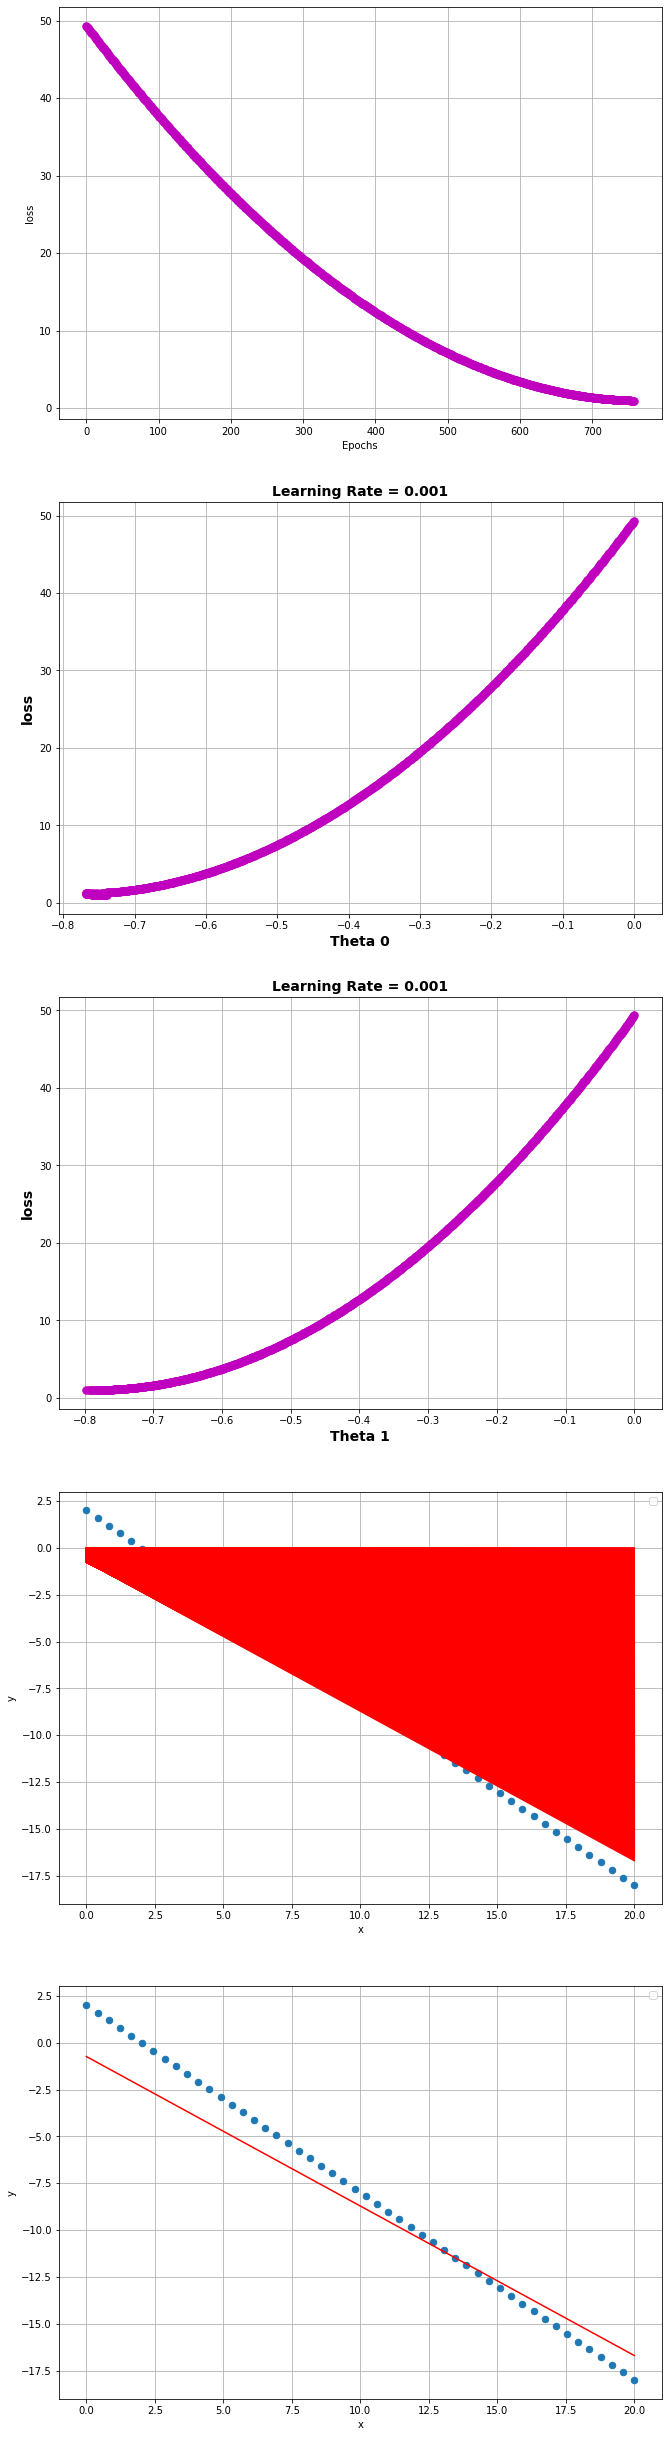

In [27]:

fig = plt.figure(figsize=(10.8, 44))

fig.add_subplot(5,1,1)
plt_loss_epoch(ad5[3],ad5[5])

fig.add_subplot(5,1,2)
plt_loss_theta_0(ad5[3],ad5[1],alpha)

fig.add_subplot(5,1,3)
plt_loss_theta_1(ad5[3],ad5[2],alpha)

fig.add_subplot(5,1,4)
plt_regression_till_converge(X,y,ad5[4])


fig.add_subplot(5,1,5)
plt_best_reg_line(X,y,ad5[4])

##### The following results uses alpha = 0.001, beta1 = 0.5, beta2 = 0.99, epsilon =  1e-08, and max. iterations = 5000.

In [28]:
alpha=0.001

ad7=adam(X,y,alpha,0.5,0.99,1e-08,5000)

Streaming output truncated to the last 5000 lines.
m_0_0 : -0.24623137159251293
m_0_1 : 5.888681258261476

m_0_0_corrected : -0.24623137159251293
m_0_1_corrected : 5.888681258261476

v_0_0 : 0.4857149943731037
v_0_1 : 235.1840091024808

v_0_0_corrected : 0.4857386522041434
v_0_1_corrected : 235.19546426366594

theta_0_new : -0.6525894167244185
theta_1_new : -0.7600658331191623

****************** Iteration 988 ********************

h(x): [ -0.65258942  -0.96282037  -1.27305132  -1.58328227  -1.89351323
  -2.20374418  -2.51397513  -2.82420608  -3.13443704  -3.44466799
  -3.75489894  -4.06512989  -4.37536084  -4.6855918   -4.99582275
  -5.3060537   -5.61628465  -5.92651561  -6.23674656  -6.54697751
  -6.85720846  -7.16743941  -7.47767037  -7.78790132  -8.09813227
  -8.40836322  -8.71859418  -9.02882513  -9.33905608  -9.64928703
  -9.95951799 -10.26974894 -10.57997989 -10.89021084 -11.20044179
 -11.51067275 -11.8209037  -12.13113465 -12.4413656  -12.75159656
 -13.06182751 -13.37205846 -13

In [30]:
from sklearn.metrics import r2_score
print(f"the score : {r2_score(y,ad7[4][-1])}")

the score : 0.9493460405768266


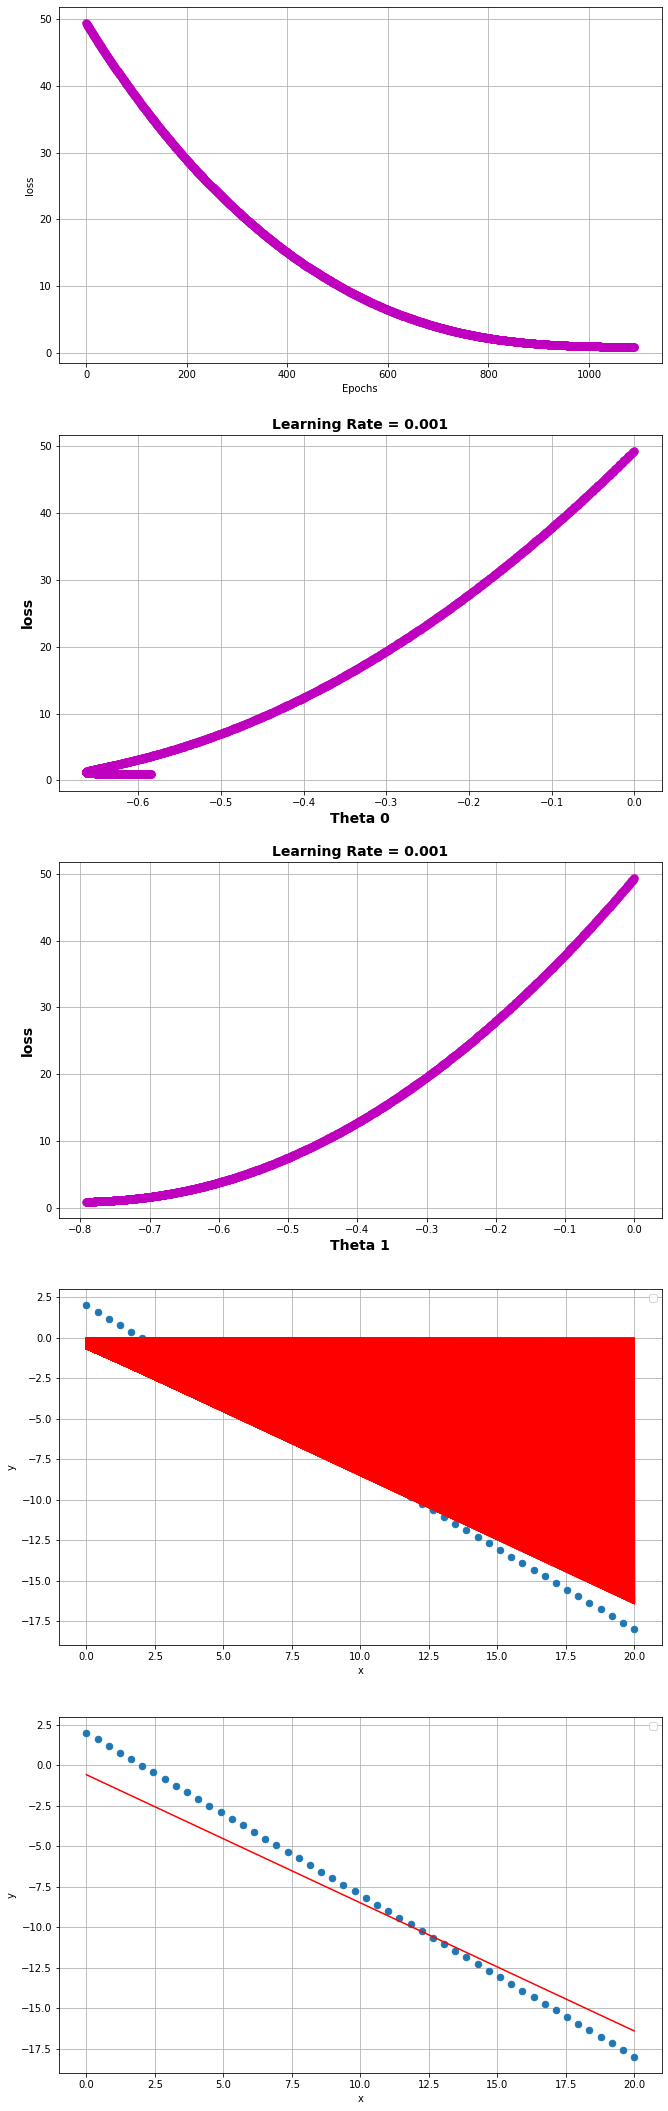

In [34]:
plot_all(ad7,X,y,alpha)

##### The following results uses alpha = 0.001, beta1 = 0.5, beta2 = 0.5, epsilon =  1e-08, and max. iterations = 5000.

In [35]:
alpha=0.001
ad8=adam(X,y,alpha,0.5,0.5,1e-08,5000)

Streaming output truncated to the last 5000 lines.

v_0_0_corrected : 0.11111774540243372
v_0_1_corrected : 191.63933522048754

theta_0_new : -0.6989678126156894
theta_1_new : -0.6990047768166922

****************** Iteration 699 ********************

h(x): [ -0.69896781  -0.98427588  -1.26958396  -1.55489203  -1.8402001
  -2.12550817  -2.41081625  -2.69612432  -2.98143239  -3.26674046
  -3.55204853  -3.83735661  -4.12266468  -4.40797275  -4.69328082
  -4.9785889   -5.26389697  -5.54920504  -5.83451311  -6.11982118
  -6.40512926  -6.69043733  -6.9757454   -7.26105347  -7.54636154
  -7.83166962  -8.11697769  -8.40228576  -8.68759383  -8.97290191
  -9.25820998  -9.54351805  -9.82882612 -10.11413419 -10.39944227
 -10.68475034 -10.97005841 -11.25536648 -11.54067456 -11.82598263
 -12.1112907  -12.39659877 -12.68190684 -12.96721492 -13.25252299
 -13.53783106 -13.82313913 -14.1084472  -14.39375528 -14.67906335]
 
Error Vector: 
[-2.69896781 -2.57611262 -2.45325743 -2.33040223 -2.20754704 -2.0

In [37]:
from sklearn.metrics import r2_score
print(f"the score : {r2_score(y,ad8[4][-1])}")

the score : 0.9475856920351761


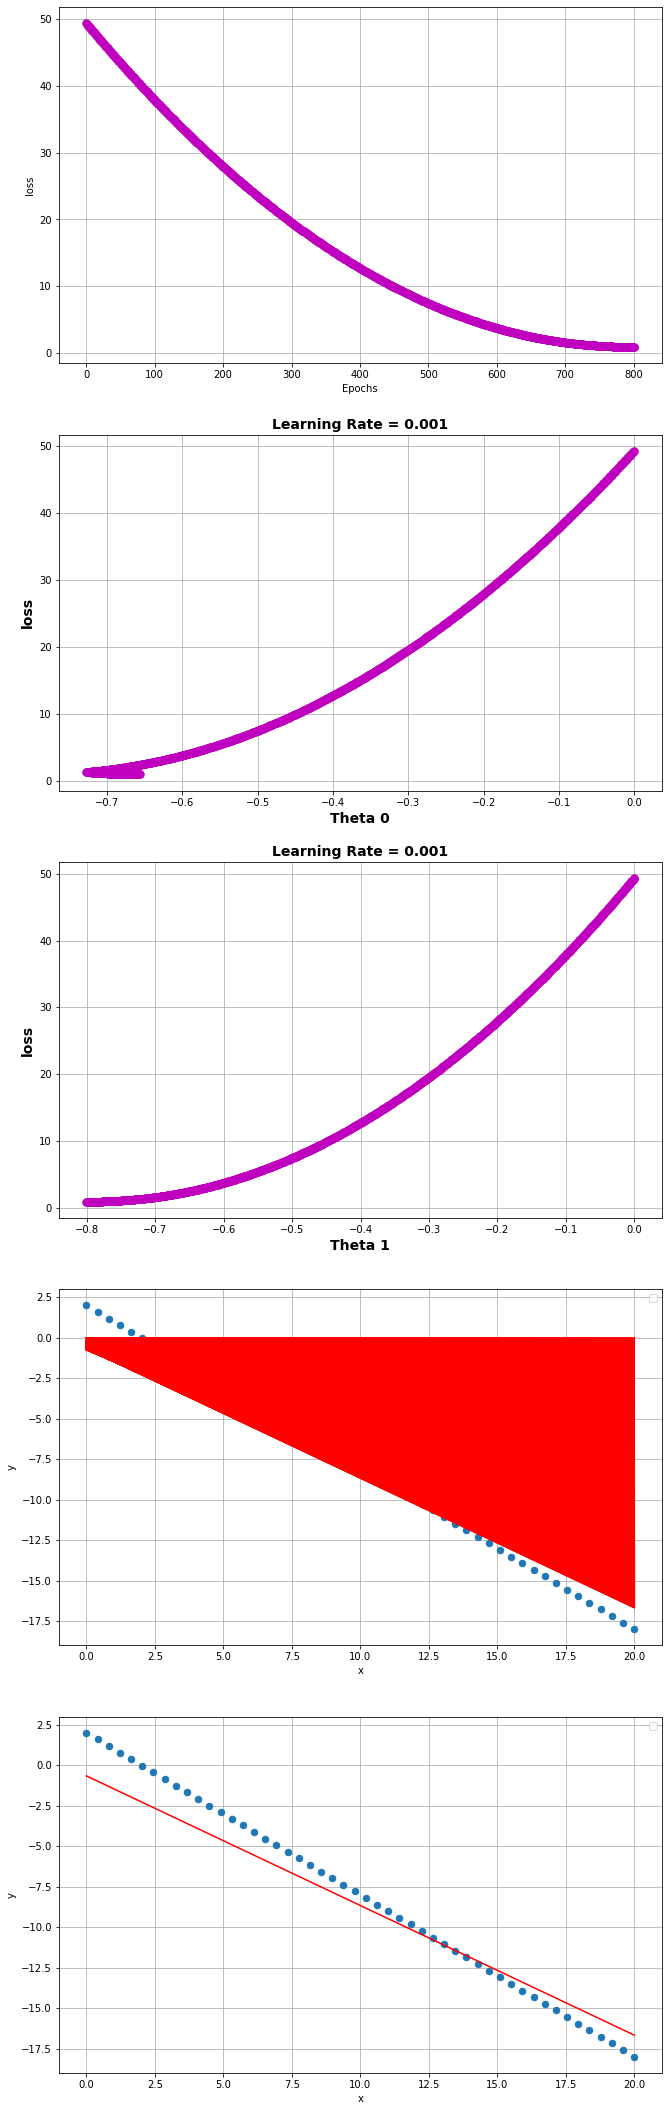

In [38]:
plot_all(ad8,X,y,alpha)

##### The following results uses alpha = 0.01, beta1 = 0.9, beta2 = 0.99, epsilon =  1e-08, and max. iterations = 5000.

In [39]:
alpha=0.01
ad9=adam(X,y,alpha,0.9,0.99,1e-08,5000)

Streaming output truncated to the last 5000 lines.
[-1.31618946 -1.27547785 -1.23476624 -1.19405463 -1.15334302 -1.11263141
 -1.0719198  -1.03120819 -0.99049658 -0.94978497 -0.90907337 -0.86836176
 -0.82765015 -0.78693854 -0.74622693 -0.70551532 -0.66480371 -0.6240921
 -0.58338049 -0.54266888 -0.50195727 -0.46124566 -0.42053405 -0.37982244
 -0.33911083 -0.29839923 -0.25768762 -0.21697601 -0.1762644  -0.13555279
 -0.09484118 -0.05412957 -0.01341796  0.02729365  0.06800526  0.10871687
  0.14942848  0.19014009  0.2308517   0.2715633   0.31227491  0.35298652
  0.39369813  0.43440974  0.47512135  0.51583296  0.55654457  0.59725618
  0.63796779  0.6786794 ]
 
j = 0.2233828179341852
 
Gradient Vector:
[[-0.31875503]
 [ 0.27293649]]

Gradient Vector Norm:
0.4196416292848232

m_0_0 : -0.33003091243430643
m_0_1 : 0.28629250932689965

m_0_0_corrected : -0.33003091243430643
m_0_1_corrected : 0.28629250932689965

v_0_0 : 0.3844018071003466
v_0_1 : 49.720822823583376

v_0_0_corrected : 0.38817625710

In [40]:
from sklearn.metrics import r2_score
print(f"the score : {r2_score(y,ad9[4][-1])}")

the score : 0.995342569329113


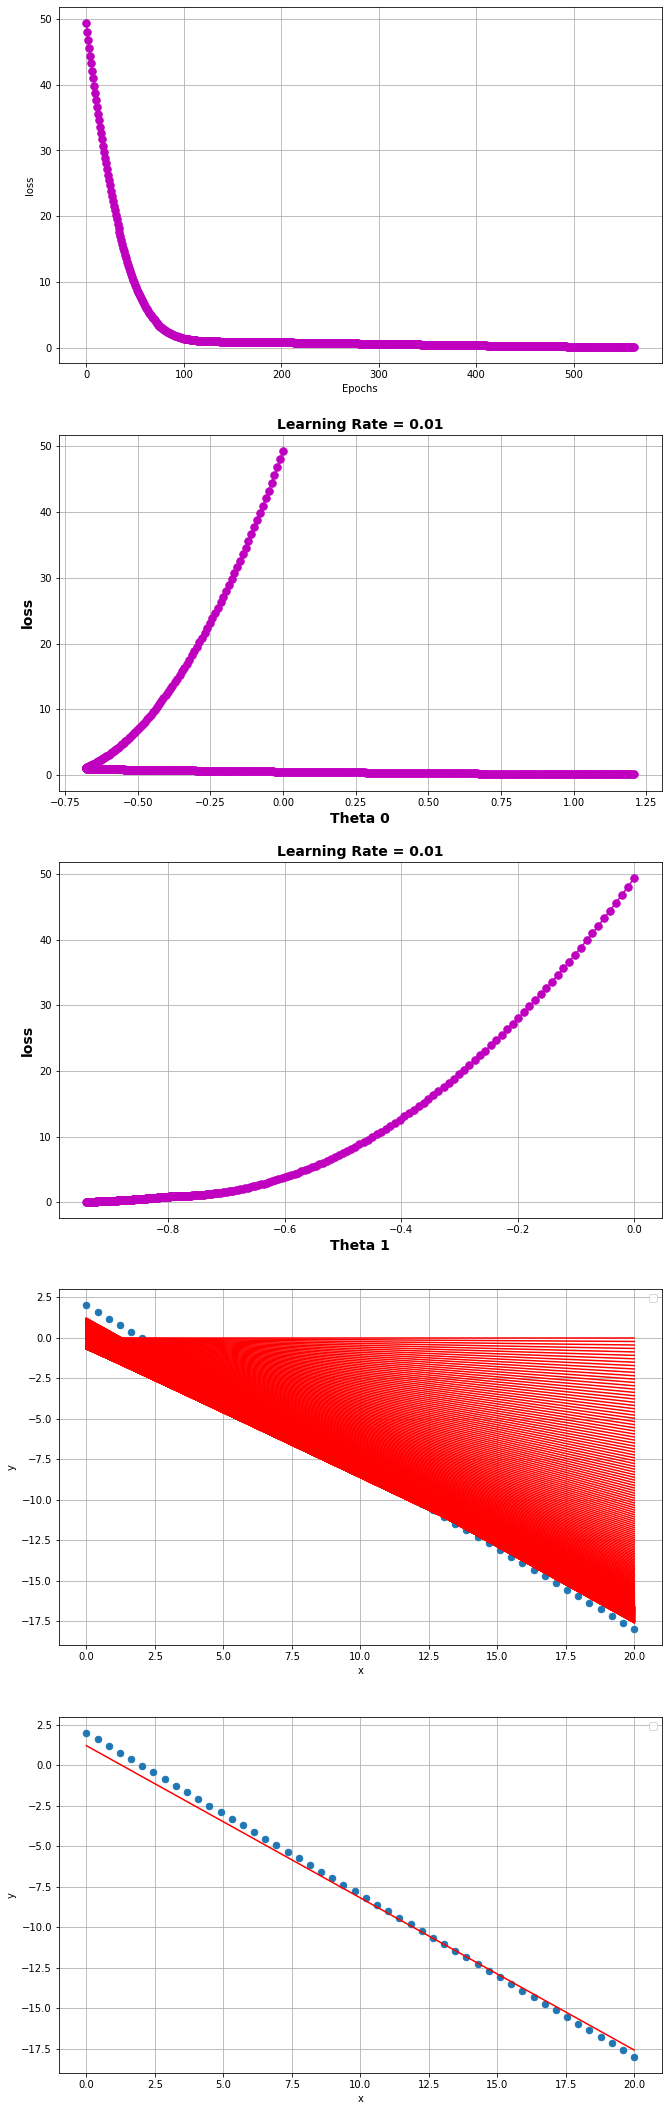

In [41]:
plot_all(ad9,X,y,alpha)

## Congratulations 
![image.png](attachment:image.png)